<img style="float: right;margin:0 10px 10px 0" src="screenshots/cdrc_logo.png" width=180>

# GEOG5995M Programming for Social Science: Core Skills <a class="tocSkip">
<br>


<img style="float: right;margin:0 10px 10px 0" src="screenshots/LIDA-logo.png" width=180><a class="tocSkip">
* #### Contact: F.L.Pontin@leeds.ac.uk <a class="tocSkip">

09.30-10.45: Spatial data visualisation Exercise 1
- Reading in spatial data
- Understanding the geometry column
- Coordinate reference systems
- Plotting maps (choropleth, point data, categorical data & multiple map layers)

10.45-11.00: Break

11.00-12.30: Spatial data analysis Exercise 2
- Subplots
- Geometric manipulations
- Sub-setting and  aggregating spatial data
- Spatial and non-spatially joining data



# Exercise 1:  getting started with spatial data

First we are going to make sure we are in the cdrc_env 

As is coding custom we import the required packages at the beginning<br>
<font color='orchid'> <b>Import the packages below </font>

In [1]:
#Import the required packages

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

import seaborn as sns




We have imported a new package 'geopandas'. Geopandas works like pandas but also handles spatial data. Geopandas was designed to allow people to easily handle and use spatial datasets in Python. <br>

Geopandas has some datasets built into the package. We are going to use these datasets to get started and make some maps.

<font color='orchid'> <b>Run the code below to explore which datasets are built in to the geopandas package </font>

In [5]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Geopandas has three in built datasets. We are going to use 'naturalearth_cities' and 'naturalearth_lowres'. <br>
To use the datasets we need to read them in from where they are stored in the geopandas package file directory. <br>
We will use the print function to check we have got the correct file path.<br>
<font color= 'orchid'> <b>Run the code bellow to get the file paths for the datasets </font>

In [12]:
  LA_shape =gpd.read_file('england_utla_2022_bgc.shp')





In [10]:
ONS_LA_shape = gpd.read_file('LAD_DEC_2022_UK_BFC_V2.shp')

## Shapefiles
Notice the file type of the 'naturalearth_cities' and 'naturalearth_lowres' is ".shp". This is a shapefile ["A shapefile is an Esri vector data storage format for storing the location, shape, and attributes of geographic features. It is stored as a set of related files and contains one feature class."](https://doc.arcgis.com/en/arcgis-online/reference/shapefiles.htm).

## Reading in spatial data
We need to read these shp files in, geopandas work the same way as pandas, but are also able to handle the spatial element of the dataset. Therefore the code we use is very similar. We use <code>geopandas.read_file(<font color =red>file_path</font>) </code> replacing <font color =red>"file_path"</font>, with the actual path to the shapefile you want to use.

<div class="alert alert-block alert-info">
<b>Note:</b> This is very similar to the <code>pd.read_csv() function</code>
</div>

<font color='orchid'> Run the code below to read the spatial data in </font>

In [7]:
# Read in the shape file data
cities = gpd.read_file(cities_path)
countries = gpd.read_file(countries_path)

### Data Exploration
Just as we have done before we are goign to explore the data by having a look at the dataframes and by visualising both the data sets.

In [11]:
ONS_LA_shape.head()

LAD22CD               LAD22NM   BNG_E   BNG_N     LONG      LAT  \
0  E06000001            Hartlepool  447160  531474 -1.27018  54.6761   
1  E06000002         Middlesbrough  451141  516887 -1.21099  54.5447   
2  E06000003  Redcar and Cleveland  464361  519597 -1.00608  54.5675   
3  E06000004      Stockton-on-Tees  444940  518183 -1.30664  54.5569   
4  E06000005            Darlington  428029  515648 -1.56835  54.5353   

                               GlobalID  \
0  72a8f681-cab0-47eb-9edf-1f385b6a41e8   
1  652d814e-8740-4364-8c0d-45d14b5c198a   
2  41714a40-41c3-491f-b4f8-851090431390   
3  cd881fc0-7ad0-45bf-8d51-f981fa87c260   
4  0dbb1dbd-fae2-43e9-bb54-51251110bd8b   

                                            geometry  
0  MULTIPOLYGON (((450154.599 525938.201, 450140....  
1  MULTIPOLYGON (((446854.700 517192.700, 446854....  
2  MULTIPOLYGON (((451747.397 520561.100, 451792....  
3  MULTIPOLYGON (((447177.704 517811.797, 447176....  
4  POLYGON ((423496.602 524724.299, 423497.204 52...

In [13]:
# let's have a look at the cities geopandas dataframe 
LA_shape.head()

label            name   utla22cd        utla22nm  \
0  E92000001E12000009E06000027          Torbay  E06000027          Torbay   
1  E92000001E12000005E10000034  Worcestershire  E10000034  Worcestershire   
2  E92000001E12000008E10000016            Kent  E10000016            Kent   
3  E92000001E12000002E10000006         Cumbria  E10000006         Cumbria   
4  E92000001E12000004E10000018  Leicestershire  E10000018  Leicestershire   

  utla22nmw                                           geometry  
0      None  POLYGON ((287648.062 57900.835, 287450.406 579...  
1      None  POLYGON ((376225.687 237546.797, 376093.406 23...  
2      None  MULTIPOLYGON (((551208.125 140136.391, 551190....  
3      None  MULTIPOLYGON (((298509.610 507908.720, 298458....  
4      None  POLYGON ((439618.837 293111.987, 439615.312 29...

Note that the dataframe has two columns:
- 'name' naming the city
- 'geometry' listing the type of geometry, in this case POINT. And two numbers - the coordiantes of the point.

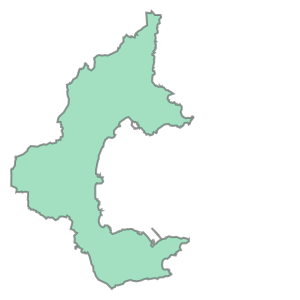

In [8]:
LA_shape.loc[0,'geometry']

## Simple spatial data visualisation
### Point data

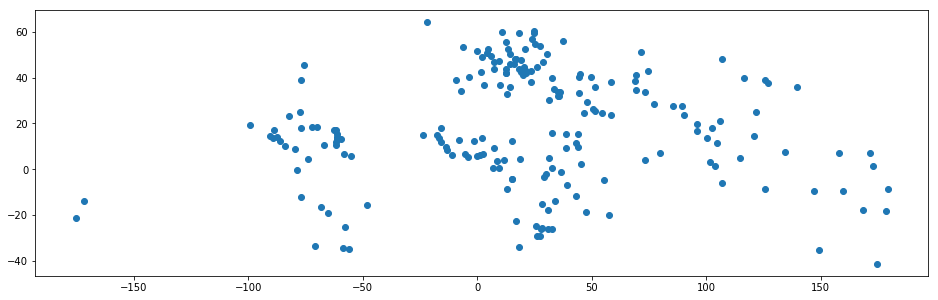

In [6]:
# Plot the cities data

# define the plot size and nummber of subplots (1 i.e. 1 plot)
f, ax = plt.subplots(1, figsize=(16, 8))
# plot the  cities, specifying the subplot axis
cities.plot(ax=ax)
# show the plot
plt.show()

Now we will do the same for the countries dataframe.

### Polygon data

In [7]:
# Explore the countries dataframe
countries.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<b>Note</b> the geometry column this time is made up of POLYGON data, made up of many coordiante points. <br>
Let us have a closer look at the polygon geometry. We are going to look at the geometry of row 1.

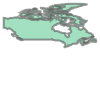

In [8]:
# Lets look at index 3 (for me it is Canada) of the geometry column
# Notice the shape is quite complex with lots of edges
countries.loc[3,'geometry']

In [9]:
# let us look at the list of coordiantes
print(countries.loc[3,'geometry'])
# Each point is a corner of the country

MULTIPOLYGON (((-122.84000000000003 49.000000000000114, -122.97421000000001 49.00253777777778, -124.91024 49.98456, -125.62461 50.416560000000004, -127.43561000000001 50.83061, -127.99276 51.71583, -127.85032 52.32961, -129.12979 52.75538, -129.30523 53.561589999999995, -130.51497 54.28757, -130.53610895273684 54.80275447679924, -130.53611 54.802780000000006, -129.98 55.285000000000004, -130.00778000000003 55.915830000000085, -131.70781 56.55212, -132.73042 57.692890000000006, -133.35556000000003 58.41028000000001, -134.27111000000002 58.86111000000005, -134.94500000000005 59.2705600000001, -135.47583 59.787780000000005, -136.47972000000004 59.46389000000005, -137.4525 58.905, -138.34089 59.562110000000004, -139.03900000000002 60, -140.013 60.27682000000001, -140.99778 60.30639000000001, -140.9925 66.00003000000001, -140.986 69.712, -140.98598761037601 69.71199839952635, -139.12052 69.47102, -137.54636000000002 68.99002, -136.50358 68.89804, -135.62576 69.31512000000001, -134.414640000

### Now let's plot all the countries

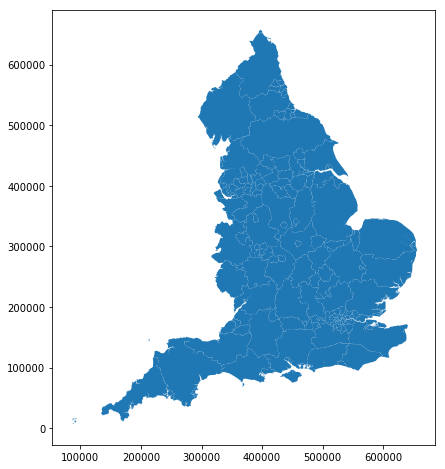

In [14]:
f,ax = plt.subplots(1, figsize=(16, 8))
LA_shape.plot(ax=ax)
plt.show()

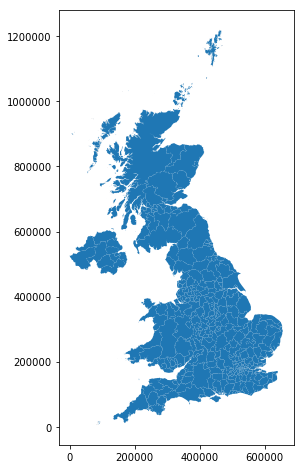

In [15]:
f,ax = plt.subplots(1, figsize=(16, 8))
ONS_LA_shape.plot(ax=ax)
plt.show()

### geopandas.explore()

<code>gpd.explore()</code> is a really useful function that generate an interactive leaflet map based on GeoDataFrame. It is particulalry useful for inital data exploration. the function creates:
- a navigatable map
- with 'zoom in and out' functionality
- and hover over function displaying the variables in the GeoDataFrame

The <code>.explore()</code> has many customisabel parameters, see the [package documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html)

In [12]:
cities.explore()

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [12]:
countries.explore()

## Coordinate Reference Systems (CRS)
Before we map multiple layers we need to check they have the same Coordinate Reference System (CRS). Using the <code>.crs</code> function

In [13]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Look at what happens when we change the projection

In [14]:
# NAD83 Canadian Spatial Reference System: Large and medium scale topographic mapping and engineering survey.
countries_new_proj= countries.to_crs(epsg=2953)

# EPSG:3851 New Zealand Geodetic Datum 2000: Spatial referencing and conformal mapping on the NZ continental shelf.
countries_new_proj2= countries.to_crs(epsg=3851)

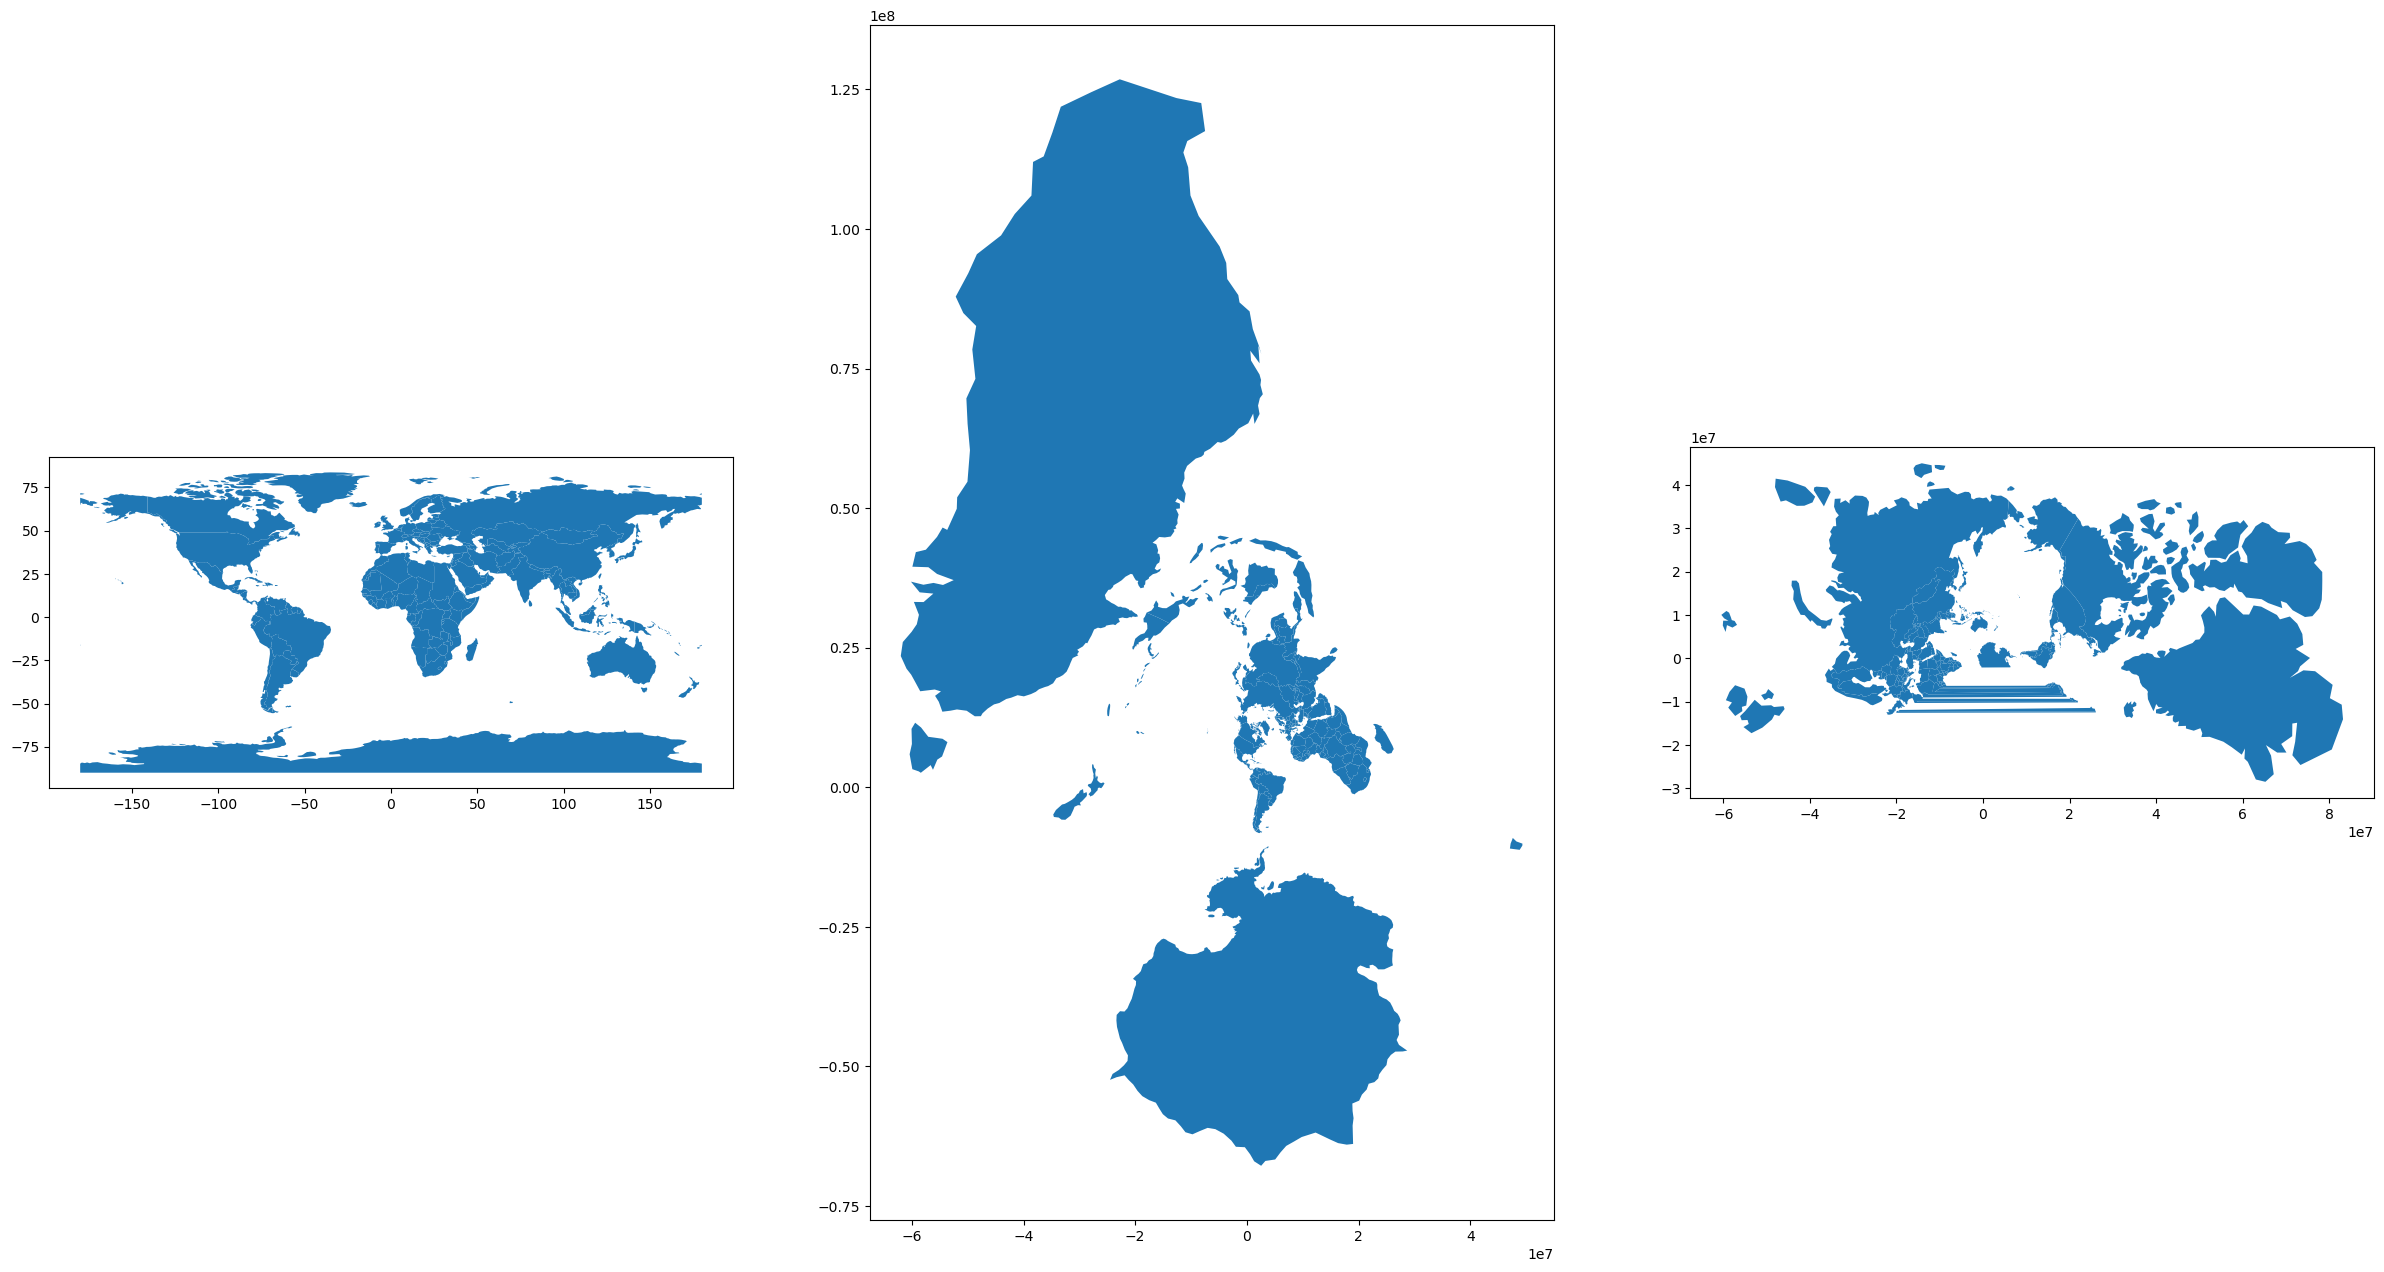

In [15]:
# plot the two diifferent projections
f, ax = plt.subplots(1,3, figsize=(30, 20))
countries.plot(ax=ax[0])
countries_new_proj.plot(ax=ax[1])
countries_new_proj2.plot(ax=ax[2])
plt.show()
# Note the different scales on the axis and orrientation of the countries

## Layering maps
Much like other mapping software it is possible to layer maps in Python. We will plot the cities on top of the countires dataset.

We need to check the CRS of both datasets is the same so we can accurately plot the layers on top of each other

In [16]:
# Check the CRS are the same
print(cities.crs, countries.crs)

EPSG:4326 EPSG:4326


## Plot the cities and countries together

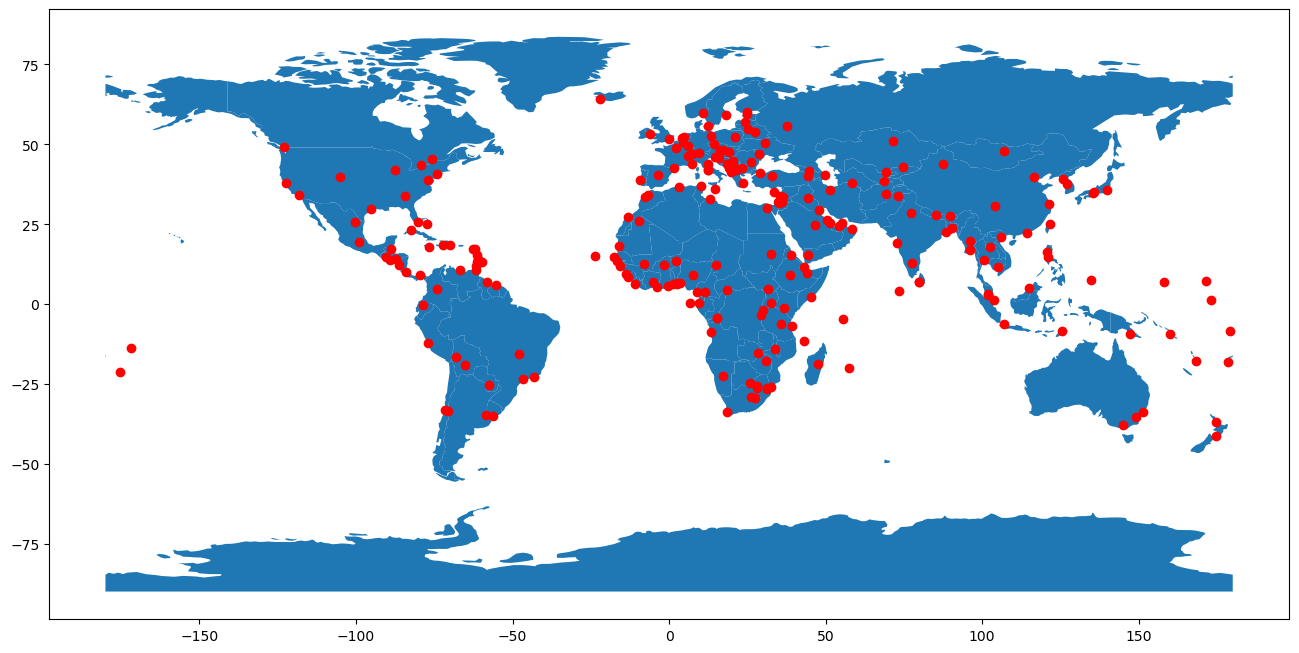

In [17]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# show the map
plt.show()

## Choropleth Mapping
Choropleth maps are maps where the polygons are coloured differenet shades or colours based on a value. E.g. Populaiton

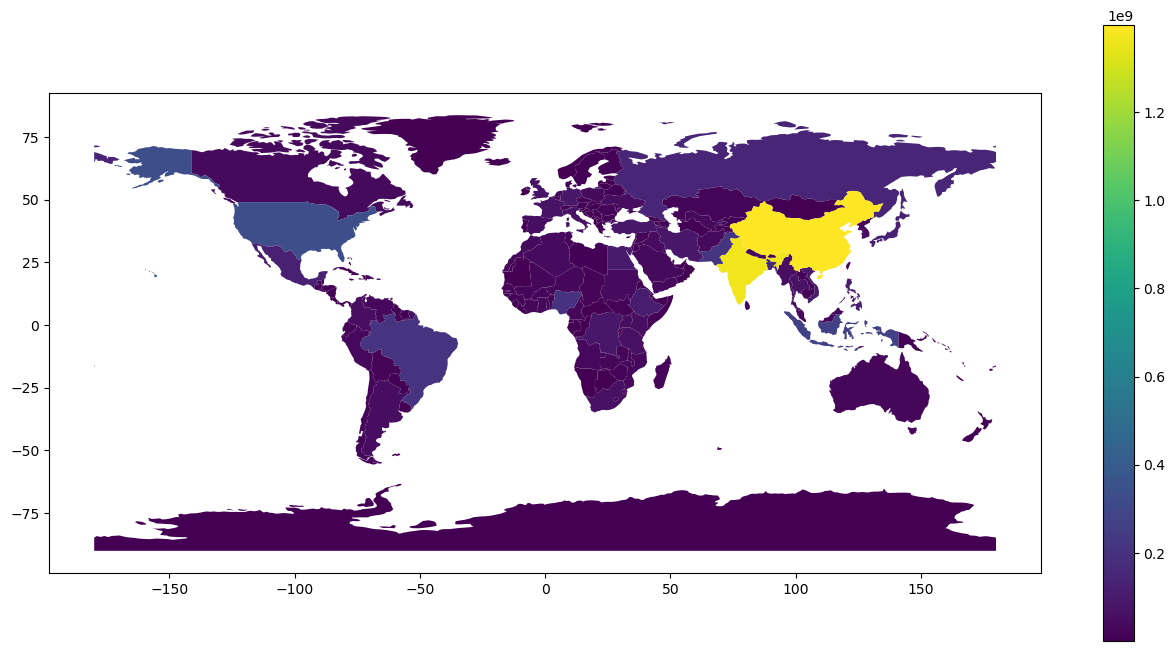

In [18]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend (legend =True)
# vmin
countries.plot(ax=ax, column ='pop_est', legend=True)
# show the map
plt.show()

<font color= 'orchid'> <b>Code your own choropleth map for 'gdp_mp_est'<b></font><br>
    Answer at the end of the workbook

In [19]:
# code your choropleth map here!

### Plotting Categorical variables
It is possible to create choropleth maps with categorical variables. To do this we specify <code> categorical=True,</code> withn the <code>plot()</code> function.<br> If we treat the continent of the country as a categorical variable we can colour the countries based on the continent they are in.<br>

Note the legend of the map is now separate colours and not a continuous colour bar 

<font color ='orchid'> <b> Run the code below to plot a categorical chloropleth </font>

In [16]:
LA_shape.head()

label            name   utla22cd        utla22nm  \
0  E92000001E12000009E06000027          Torbay  E06000027          Torbay   
1  E92000001E12000005E10000034  Worcestershire  E10000034  Worcestershire   
2  E92000001E12000008E10000016            Kent  E10000016            Kent   
3  E92000001E12000002E10000006         Cumbria  E10000006         Cumbria   
4  E92000001E12000004E10000018  Leicestershire  E10000018  Leicestershire   

  utla22nmw                                           geometry  
0      None  POLYGON ((287648.062 57900.835, 287450.406 579...  
1      None  POLYGON ((376225.687 237546.797, 376093.406 23...  
2      None  MULTIPOLYGON (((551208.125 140136.391, 551190....  
3      None  MULTIPOLYGON (((298509.610 507908.720, 298458....  
4      None  POLYGON ((439618.837 293111.987, 439615.312 29...

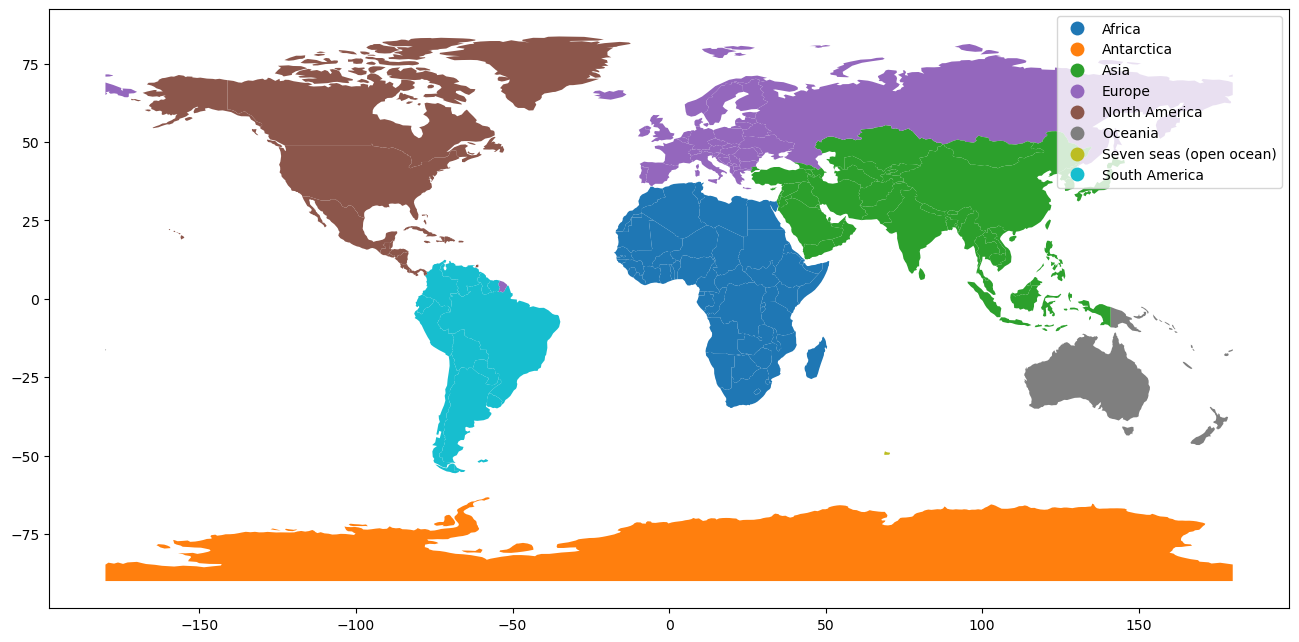

In [20]:
f,ax = plt.subplots(1, figsize=(16,8))
countries.plot(ax=ax, column ='continent', categorical=True, legend=True)
plt.show();

## Subsetting spatial data
We can also work with and plot just a subset of the spatial data. For example we might only be interested in Africa. In which case we can use the <code>.loc[]</code> fucntion to locate all rows (countries) where the continent is Africe. Just like we would normally do in a non-spatial pandas dataframe.<br>

<font color ='orchid'> <b>Run the code below </font>

In [21]:
# locate countries (rows) in Africa
africa= countries.loc[countries['continent']=='Africa']
# view the newly created Africa dataframe
africa

pop_est continent                  name iso_a3  gdp_md_est  \
1     58005463.0    Africa              Tanzania    TZA       63177   
2       603253.0    Africa             W. Sahara    ESH         907   
11    86790567.0    Africa       Dem. Rep. Congo    COD       50400   
12    10192317.3    Africa               Somalia    SOM        4719   
13    52573973.0    Africa                 Kenya    KEN       95503   
14    42813238.0    Africa                 Sudan    SDN       30513   
15    15946876.0    Africa                  Chad    TCD       11314   
25    58558270.0    Africa          South Africa    ZAF      351431   
26     2125268.0    Africa               Lesotho    LSO        2376   
48    14645468.0    Africa              Zimbabwe    ZWE       21440   
49     2303697.0    Africa              Botswana    BWA       18340   
50     2494530.0    Africa               Namibia    NAM       12366   
51    16296364.0    Africa               Senegal    SEN       23578   
52    19658031.0    Africa                  Mali    MLI       17279   
53     4525696.0    Africa            Mauritania    MRT        7600   
54    11801151.0    Africa                 Benin    BEN       14390   
55    23310715.0    Africa                 Niger    NER       12911   
56   200963599.0    Africa               Nigeria    NGA      448120   
57    25876380.0    Africa              Cameroon    CMR       39007   
58     8082366.0    Africa                  Togo    TGO        5490   
59    30417856.0    Africa                 Ghana    GHA       66983   
60    25716544.0    Africa         Côte d'Ivoire    CIV       58539   
61    12771246.0    Africa                Guinea    GIN       12296   
62     1920922.0    Africa         Guinea-Bissau    GNB        1339   
63     4937374.0    Africa               Liberia    LBR        3070   
64     7813215.0    Africa          Sierra Leone    SLE        4121   
65    20321378.0    Africa          Burkina Faso    BFA       15990   
66     4745185.0    Africa  Central African Rep.    CAF        2220   
67     5380508.0    Africa                 Congo    COG       12267   
68     2172579.0    Africa                 Gabon    GAB       16874   
69     1355986.0    Africa            Eq. Guinea    GNQ       11026   
70    17861030.0    Africa                Zambia    ZMB       23309   
71    18628747.0    Africa                Malawi    MWI        7666   
72    30366036.0    Africa            Mozambique    MOZ       15291   
73     1148130.0    Africa              eSwatini    SWZ        4471   
74    31825295.0    Africa                Angola    AGO       88815   
75    11530580.0    Africa               Burundi    BDI        3012   
78    26969307.0    Africa            Madagascar    MDG       14114   
80     2347706.0    Africa                Gambia    GMB        1826   
81    11694719.0    Africa               Tunisia    TUN       38796   
82    43053054.0    Africa               Algeria    DZA      171091   
154    6081196.0    Africa               Eritrea    ERI        2065   
162   36471769.0    Africa               Morocco    MAR      119700   
163  100388073.0    Africa                 Egypt    EGY      303092   
164    6777452.0    Africa                 Libya    LBY       52091   
165  112078730.0    Africa              Ethiopia    ETH       95912   
166     973560.0    Africa              Djibouti    DJI        3324   
167    5096159.0    Africa            Somaliland    SOL       17836   
168   44269594.0    Africa                Uganda    UGA       35165   
169   12626950.0    Africa                Rwanda    RWA       10354   
176   11062113.0    Africa              S. Sudan    SSD       11998   

                                              geometry  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
11   POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
12   POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
13   POLYGON ((39.20222 -4.6767

It is now possible to plot just Africa. We can also put maps side by side to compare them. Here we are going to plot population estimate for each country and the estimated GDP for each country.<br>

<font color = 'orchid'> <b> Run the code below,</b> make sure you understand what each line does (there is a lot going on)</font>

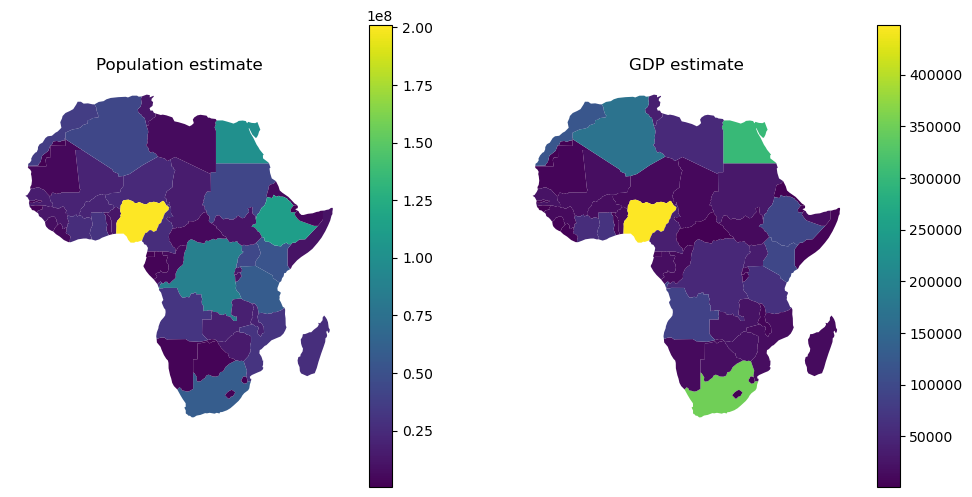

In [22]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(1,2, figsize=(12,6))

# plot population estimate in subplot 1
africa.plot(ax=ax[0], column ='pop_est', legend=True)

# plot gdp estimate in subplot 2
africa.plot(ax=ax[1], column ='gdp_md_est', legend=True)

# give subplot 1 an informative title
ax[0].set_title('Population estimate')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()

# show figure
plt.show()

## Subplots and axes

A quick note on the subplot and ax indexing. It can be a little tricky getting your head arround the indexing used when creating subplots.
To create mulitple subplots you use the code below, specifying firstly the number of rows then the number of columns. <br>
<code>.subplots([number of rows], [number of columns])</code>

When you are then specifyng each individual plot, you need to specify the axes of the plot, using the code <code> ax=ax[]</code>. The indexing for the axes starts at 0. I.e. the first row is 'row 0' and the first column, 'column 0'. This is illustrated below. 
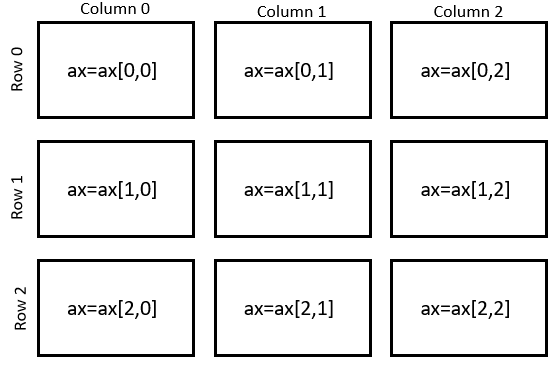

For a set of subplots with just one row you only need to specify the column in the <code>ax=ax[]</code> function. <br>
I.e. <code>ax=ax[column number]</code> <br>

I.e.<code> plt.subplot(1,2) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
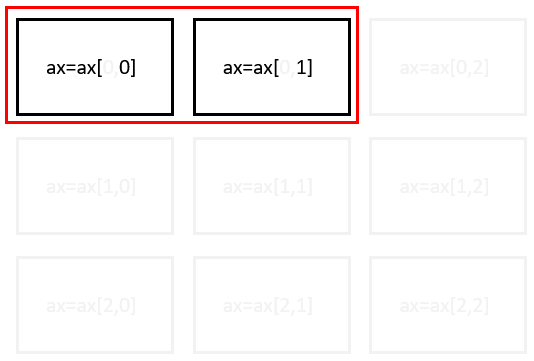 

Simialrly for a set of subplots with just one column you only need to specify the row in the <code>ax=ax[]</code> function. <br>
<code> plt.subplot(2,1) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
</code>
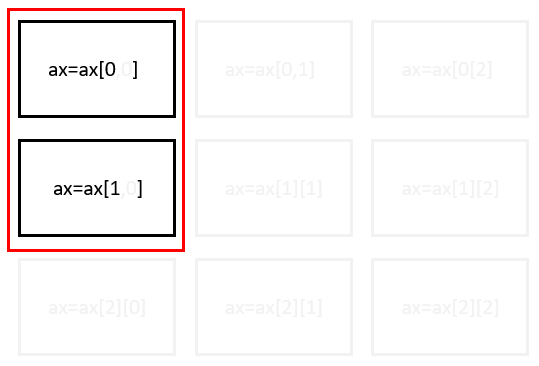

For a set of subplots with just multiple rows and columns you only need to specify both in the <code>ax=ax[,]</code> funciton.(row first then column)<br>
<code>plt.subplot(2,3)<br>
dataframe.plot(ax=ax[0,0], ... 
dataframe.plot(ax=ax[0,1], ...
dataframe.plot(ax=ax[0,2], ...
dataframe.plot(ax=ax[1,0], ...
dataframe.plot(ax=ax[1,1], ...
dataframe.plot(ax=ax[1,2], ...</code>
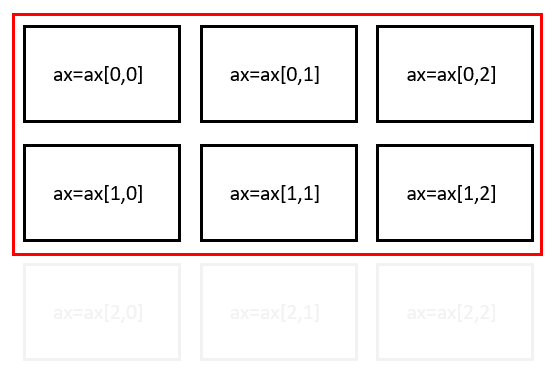

<div class="alert alert-block alert-warning">
    
## Extra task: Using USA data

### The data

In [23]:
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

# remove cities in sates not in the contiguous USA (not connected directly to the mainland), for ease of plotting
continental_usa_cities = usa_cities.loc[(usa_cities['STATE'] !="HI") & (usa_cities['STATE'] !="AK" ) & (usa_cities['STATE'] !="PR")]


In [24]:
continental_usa_cities.head()

id  POP_2010  ELEV_IN_FT STATE                     geometry
0   53   40888.0      1611.0    ND  POINT (-101.29627 48.23251)
1  101   52838.0       830.0    ND   POINT (-97.03285 47.92526)
2  153   15427.0      1407.0    ND   POINT (-98.70844 46.91054)
3  177  105549.0       902.0    ND   POINT (-96.78980 46.87719)
4  192   17787.0      2411.0    ND  POINT (-102.78962 46.87918)

<Axes: >

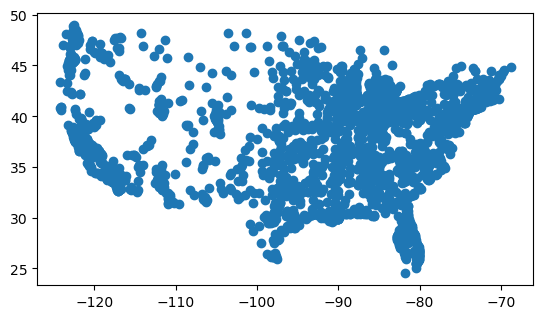

In [25]:
continental_usa_cities.plot()

In [26]:
contiguous_usa.head()

state adm1_code  population  \
0     Minnesota  USA-3514     5303925   
1       Montana  USA-3515      989415   
2  North Dakota  USA-3516      672591   
3         Idaho  USA-3518     1567582   
4    Washington  USA-3519     6724540   

                                            geometry  
0  POLYGON ((-89.59941 48.01027, -89.48888 48.013...  
1  POLYGON ((-111.19419 44.56116, -111.29155 44.7...  
2  POLYGON ((-96.60136 46.35136, -96.53891 46.199...  
3  POLYGON ((-111.04973 44.48816, -111.05025 42.0...  
4  POLYGON ((-116.99807 46.33017, -116.90653 46.1...

<Axes: >

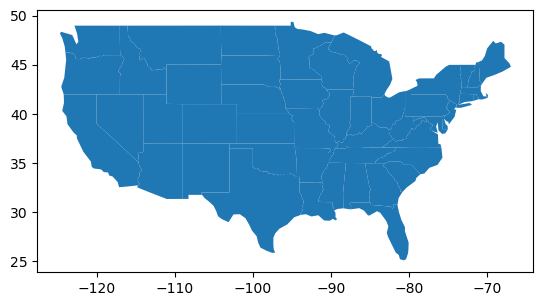

In [27]:
contiguous_usa.plot()

### Tasks:
- check the CRS of both geo data frames
- produce a layered map of cities and states
- Produce a choropleth map of 2010 popualation
- produce a choropleth map of elevation
- Colour city by state
- subset the data to plot a single state e.g. Washington

<h1><font color =red> End of exercise (stop here) </font>

# Exercise: Manipulating spatial data

## Geometric Manipulations 

### Buffers

A buffer in geographic information system (GIS) is a zone around a map feature measured in units of distance or time.

In Python we specify the buffer size: the radius of the buffer (in this case size is measured in degrees as the projection is epsg 4326).

E.g.:
<code> dataframe.crs ={'init': 'epsg:4326'} </code>

<code> dataframe.buffer(distance =10) </code> distance = 10 degrees.

/var/folders/zb/krmfm5g13lz_rmrhr0vqhjbw0000gn/T/ipykernel_65410/2847637102.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities.buffer(distance=10).plot();


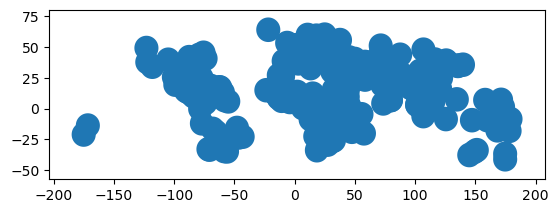

In [27]:
cities.buffer(distance=10).plot();

If we want to measure the buffer in meters we can change the projection to [EPSG 3857](https://epsg.io/3857) where the projection unit is meters (rather than degrees). 

Note: At the world scale this will result in errors in measurement due to the earth curvature. At a smaller scale, depending on where you are mapping other projections are more suitable e.g. [EPSG:4959](https://epsg.io/4959) is used in New Zealand

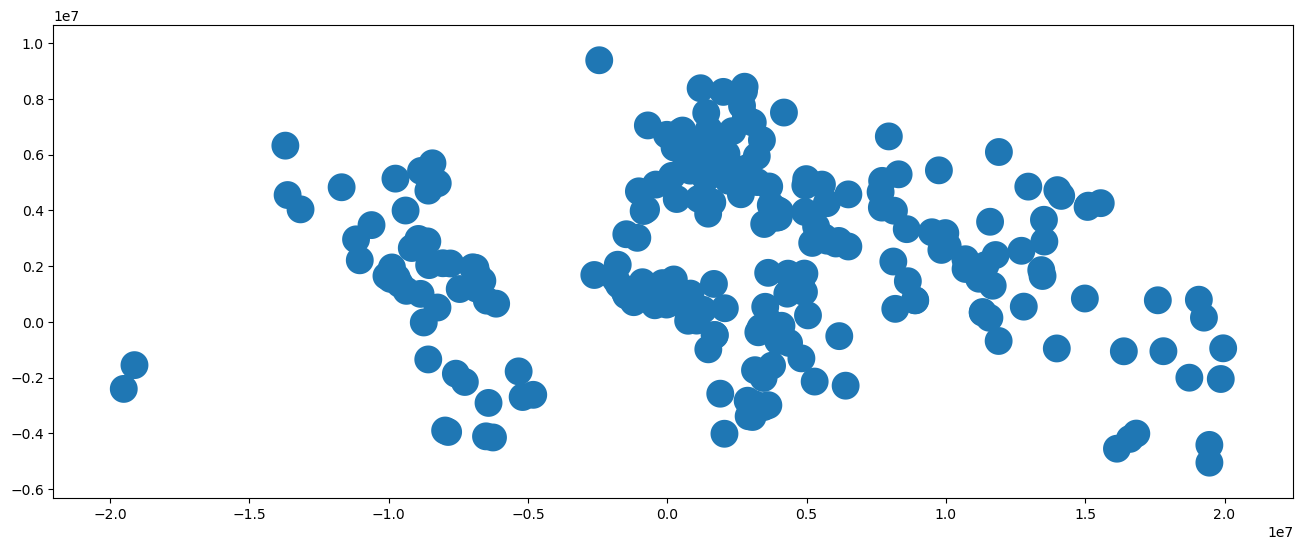

In [28]:
#Plot 500 km (500,0000 m) buffer arround cities

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

cities.to_crs('epsg:3857').buffer(distance=500000).plot(ax=ax)

plt.show()

In order to keep information about the area begin buffered in the newly created buffer geo-data-frame it is useful to copy the original data you want to conduct the geometric maipulation on, and name it something else e.g. data_buffer.

Then replace the geometry column in the copied data with the calculated buffer geometry.

E.g. 
<code> dataframe_buffer = dataframe.copy() </code>

<code> dataframe_buffer['geometry'] = dataframe.buffer(distance)</code>

In [33]:
# copy the cities dataframe
cities_buffer = cities.copy()

# apply the function (replacing the geometry column with the buffer geometry)
cities_buffer['geometry'] = cities.buffer(10)

cities_buffer.head()

name                                           geometry
0  Vatican City  POLYGON ((22.45339 41.90328, 22.40523 40.92311...
1    San Marino  POLYGON ((22.44177 43.93610, 22.39362 42.95592...
2         Vaduz  POLYGON ((19.51667 47.13372, 19.46852 46.15355...
3    Luxembourg  POLYGON ((16.13000 49.61166, 16.08185 48.63149...
4       Palikir  POLYGON ((168.14997 6.91664, 168.10182 5.93647...

Note because we copied the cities data frame above the cities_buffer data frame contains the name of the city.

<font color = 'orchid'> <b> Try just running the code </b> <code>cities.buffer(10, resolution=10)</code>. </font> 
    
Note we get a geopandas array with the geometry data but not the corresponding city that is being buffered

In [31]:
# run the code
cities.buffer(10, resolution=10)

0      POLYGON ((22.453 41.903, 22.330 40.339, 21.964...
1      POLYGON ((22.442 43.936, 22.319 42.372, 21.952...
2      POLYGON ((19.517 47.134, 19.394 45.569, 19.027...
3      POLYGON ((16.130 49.612, 16.007 48.047, 15.641...
4      POLYGON ((168.150 6.917, 168.027 5.352, 167.66...
5      POLYGON ((181.380 7.103, 181.257 5.539, 180.89...
6      POLYGON ((189.217 -8.517, 189.094 -10.081, 188...
7      POLYGON ((144.627 7.487, 144.503 5.923, 144.13...
8      POLYGON ((17.407 43.740, 17.284 42.175, 16.917...
9      POLYGON ((183.018 1.338, 182.894 -0.226, 182.5...
10     POLYGON ((53.240 -11.704, 53.117 -13.269, 52.7...
11     POLYGON ((11.516 42.500, 11.393 40.936, 11.027...
12     POLYGON ((-51.517 10.652, -51.640 9.088, -52.0...
13     POLYGON ((40.059 -1.952, 39.935 -3.516, 39.569...
14     POLYGON ((41.133 -26.317, 41.010 -27.881, 40.6...
15     POLYGON ((41.580 4.830, 41.457 3.266, 41.091 1...
16     POLYGON ((24.515 46.055, 24.392 44.491, 24.026...
17     POLYGON ((27.117 48.150,

We can add the cities_buffer layer to the map along with the countries and cities layers.

<font color = 'orchid'> <b> Run the code below, read the comments to understand what each line of code is doing  </font>

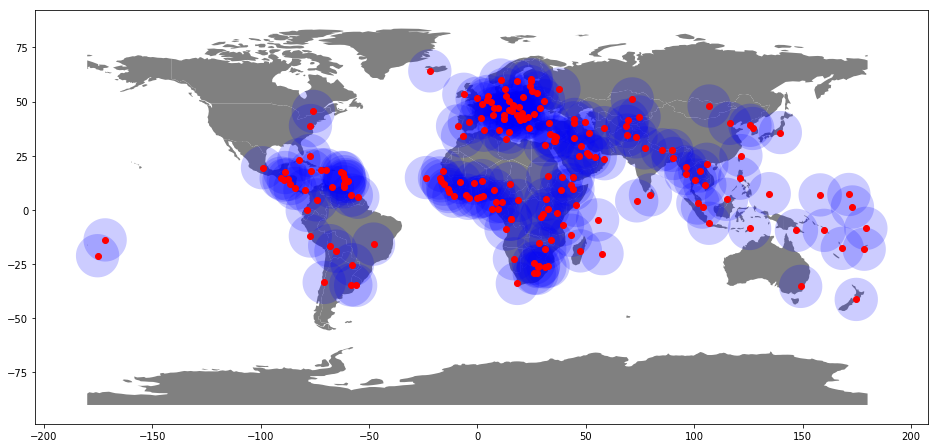

In [34]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the city buffers on the basemap axis, colour buffers blue
cities_buffer.plot(ax=base,color='blue', alpha=0.2)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# shw the map
plt.show()

### Centroids

Put simply the centroid is the center most point of a polygon (there are different debated methods of calculating centroids, but unless you are using centroids for a specific purpose the method should not matter too much). 

#### Why calculate centroids?

Lots of geometric manipulations and analysis use centroids. For example you might use centroids to as a proxy to measure the distance between two polygons.


<font color = 'orchid'> <b>Use the code </b> <code> dataframe.centroid </code> <b>to find the country centroids (run the next 3 cells of code for the worked example below) </font>

In [35]:
# copy the countries dataframe
countries_centroid = countries.copy()

# calcualte the centorid 
# and replace the country geometry (polygon) with the centroid geometry (point)
countries_centroid['geometry'] = countries.centroid

# check - geometry should contain point data
countries_centroid.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                      geometry  
0  POINT (163.85316 -17.31631)  
1    POINT (34.75299 -6.25773)  
2   POINT (-12.13783 24.29117)  
3   POINT (-98.14238 61.46908)  
4  POINT (-112.59944 45.70563)

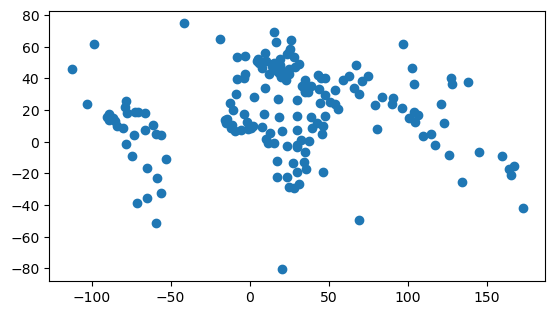

In [33]:
# plot to check it looks as expected
countries_centroid.plot();

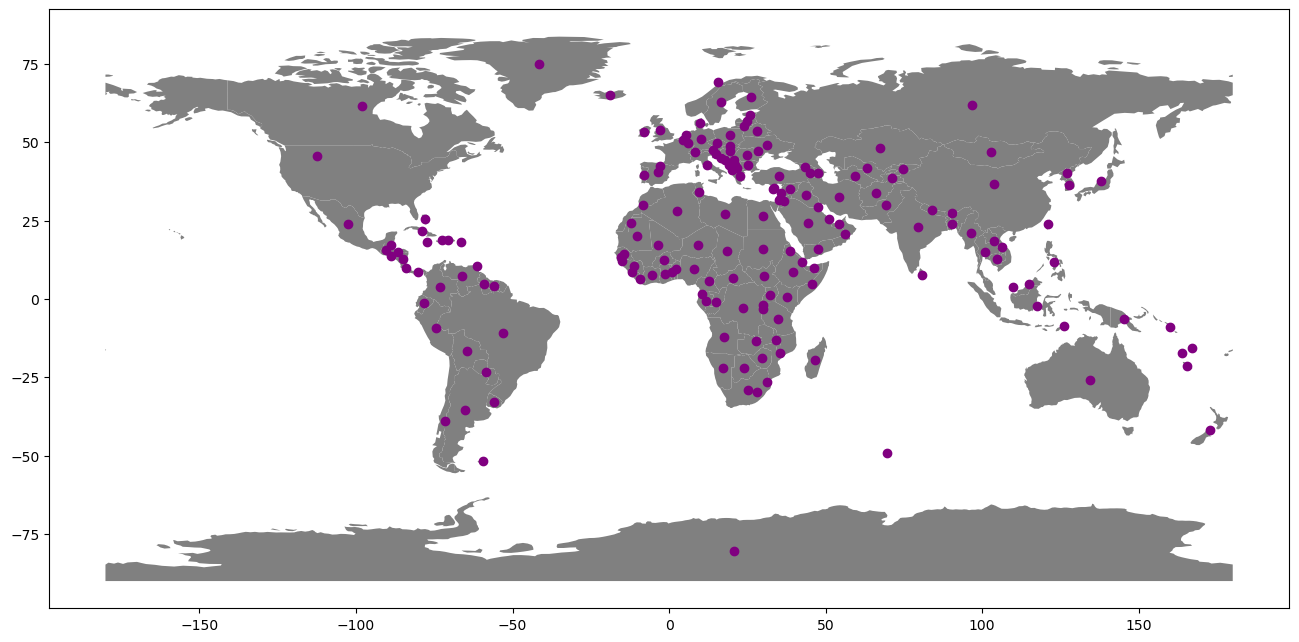

In [34]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,color='purple')

# show the map
plt.show()

We can also change marker size and colour of plotted points to reflect the data they represent (as we did with the chloropleth maps for polygon data). 

Note as population sizes are large (i.e. millions) I have assigned marker size to 'pop_est'/1,000,000, so the markers are plot-able. 

<font color = 'orchid'> <b>Run the code below, then try removing or reducing the size of <code>/1000000</code> and see what happens </font>

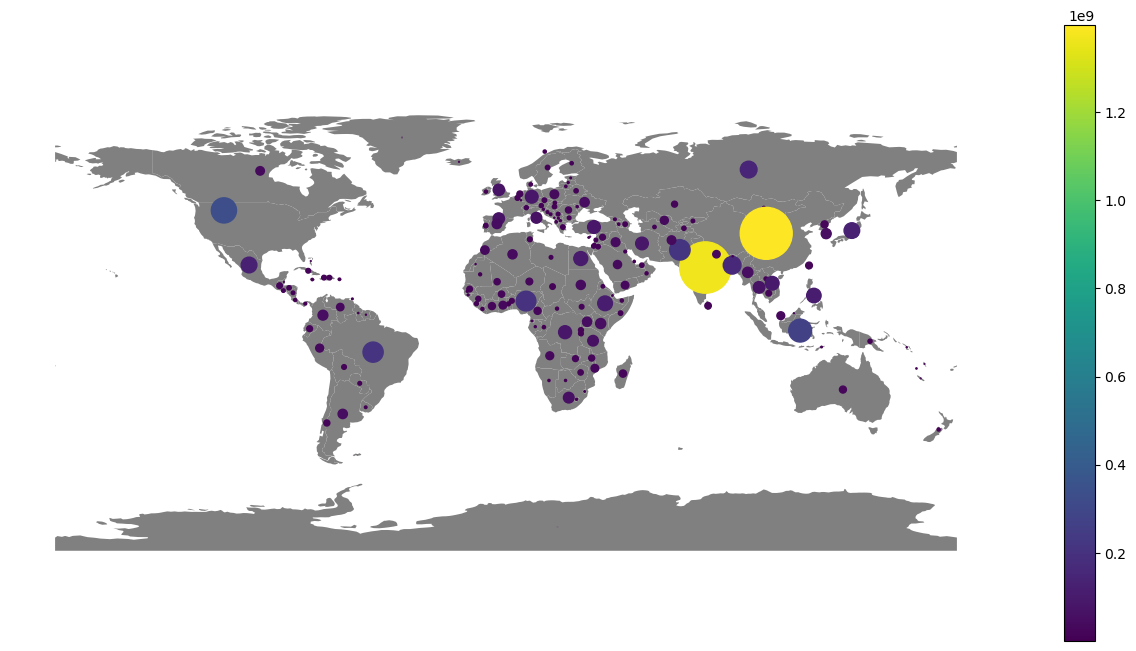

In [35]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,column='pop_est',markersize=countries['pop_est']/1000000, legend=True)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

### Convex hull polygons

A convex hull is the smallest polygon that you can draw around a collection of points/a polygon.

<font color = 'orchid'> <b>Run the code below to create convex hull polygons (using the code </b><code> dataframe.convex_hull</code><b> around the countries in Africa </font>

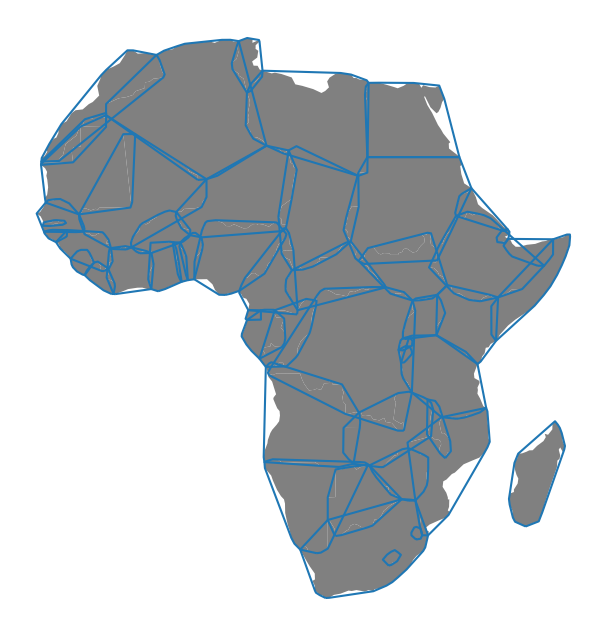

In [36]:
africa_convex_hull = africa.copy()

africa_convex_hull['geometry'] = africa.convex_hull

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = africa.plot(ax=ax, color='grey')

# plot the africa convex hull polygons
# .boundary alows us to just plot the polygon outline
africa_convex_hull.boundary.plot(ax=base)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

<div class="alert alert-block alert-warning">

### Coding task 
Try: 
    - Buffering the countries centroids 
    - Buffering the Africa convex hull polygons 
    - Getting the centroid of the africa convex hull polygons
    - Getting the convex hull polygons of all the countries (note this might look a bit messy)
    
Answers at end of exercise 2. 

## Spatially aggregating data
Often our data will not be at the same spatial scale so we may need to aggreaget areas of data together to get them to the same spatial scale. Or we may only be interested in larger spatial trends. Therefore we need to convert our smaller area data to larger area data. In geopandas we can easily so this using the <code>dissolve</code> function. 
In this example we are going to aggregate countries up to continent level. <br>
Think of dissolve as removing all the internal country boarders within the continent to leave just the continent outline.<br>
The data for the continent also gets aggregated e.g. estimated populaitn and GDP. <br>
<font color='orchid'> <b> Run the code below </font>

In [28]:
# specify which columns from the countries dataframe we are going to aggreagate,
# use the continent column to inform the dissolve
continents = countries[['continent', 'pop_est', 'geometry','gdp_md_est']].dissolve(by='continent', aggfunc='mean').reset_index()

# view the new continents dataframe
continents

continent                                           geometry  \
0                   Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...   
1               Antarctica  MULTIPOLYGON (((-61.139 -79.981, -60.610 -79.6...   
2                     Asia  MULTIPOLYGON (((48.679 14.003, 48.239 13.948, ...   
3                   Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...   
4            North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...   
5                  Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...   
6  Seven seas (open ocean)  POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...   
7            South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...   

        pop_est    gdp_md_est  
0  2.390542e+07  1.181430e+05  
1  4.050000e+03  8.100000e+02  
2  9.338606e+07  1.179460e+06  
3  1.913842e+07  6.483302e+05  
4  3.183567e+07  1.305841e+06  
5  5.254692e+06  2.018407e+05  
6  1.400000e+02  1.600000e+01  
7  3.219544e+07  4.905455e+05

Think carefully about how you want to aggregate the columns, we can also assign an aggfunction to each column (as we did with <code>.agg()</code> in day 1 when looking at the bike share data).

E.g.
<code>, aggfunc={'r_rank':'mean','r_exp':'max'})</code>

There is no quick way to assign multiple columns the same function so with a large dataset you might want to consider which columns you include in the aggregated spatial data frame. 


In [38]:
africa_cont = gpd.GeoDataFrame(continents.loc[continents['continent']=='Africa'])
africa_cont

continent                                           geometry       pop_est  \
0    Africa  MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...  2.561510e+07   

     gdp_md_est  
0  48147.333333

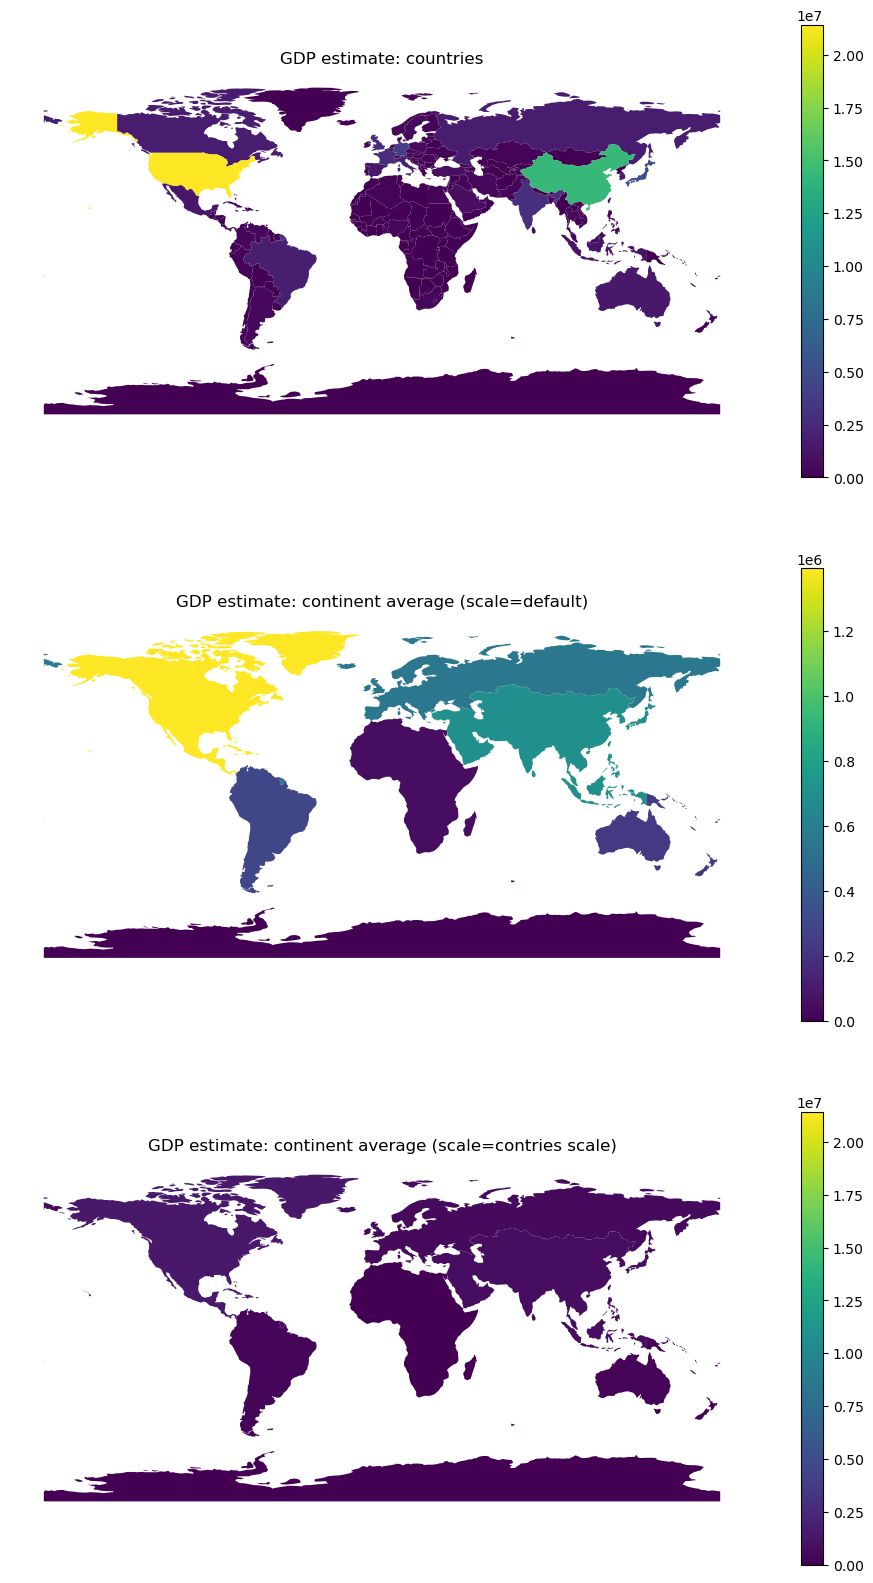

In [39]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(3,1, figsize=(12,20),sharex=True, sharey=True)

# plot countries mid year GDP estimate
countries.plot(ax=ax[0], column ='gdp_md_est', vmin=0,vmax=countries['gdp_md_est'].max() ,legend=True)

# plot countinent average mid year GDP estimate, default legend scale
continents.plot(ax=ax[1], column ='gdp_md_est', vmin=0,legend=True)

# plot countinent average mid year GDP estimate: countries legend scale 
continents.plot(ax=ax[2], column ='gdp_md_est', vmin=0,vmax=countries['gdp_md_est'].max() ,legend=True)

#patch_col = ax[0].collections[0]
#cb = f.colorbar(patch_col, ax=ax, shrink=0.5)

# make axis invisible for subplots
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

# give subplot 1 an informative title
ax[0].set_title('GDP estimate: countries')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate: continent average (scale=default)')

# give subplot 2 an informative title
ax[2].set_title('GDP estimate: continent average (scale=contries scale)')

# show figure
plt.show()

<font color= 'orchid'><b>Run the code below to plot a choropleth map of popualtion estimates for the continents</font>

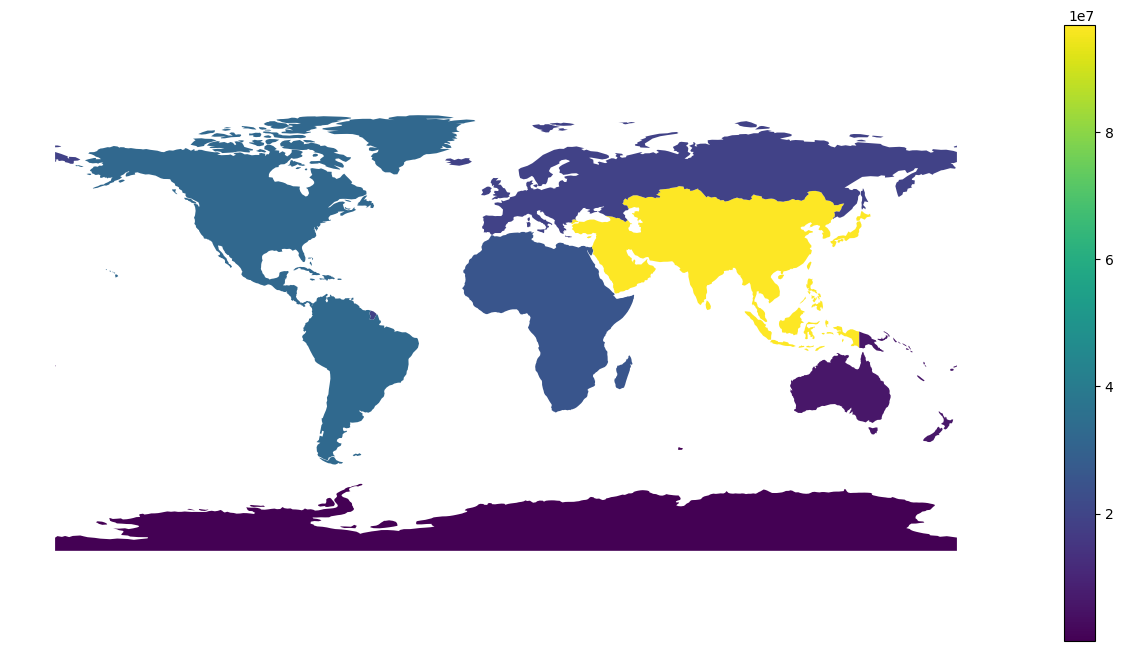

In [40]:
f,ax = plt.subplots(1, figsize=(16,8))
continents.plot(column='pop_est',legend=True, ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

<font color='orchid'> <b>Try plotting continents by 'gdp_md_est' </font> <br>
Answer at the end

In [41]:
#  plot here!

## Joining a non-spatial dataset to a spatial dataset

We are going to read in some data about forest coverage of differenet countires and join it to the countires dataframe

<font color ='orchid'><b> Run the code below to read in a csv of country forest coverage data </font>

In [17]:
# read in csv data using pandas
Activity = pd.read_csv('SALT Data File (Descriptions).csv')
# have a quick look at the dataframe
Activity.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,7,8,9,13,16,17,18,19,22,23,24,28,31,34,35,36,37,40,41,42,43,44,45,46,48,49,50,51,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


GEOGRAPHY_LEVEL    SHEET TABLE ADDITIONAL_CELLS    DATA_LEVEL  FY_Ending  \
0  Local Authority  STS002B     3              NaN  COLUMN TOTAL       2022   
1  Local Authority  STS002B     3              NaN  COLUMN TOTAL       2022   
2  Local Authority  STS002B     3              NaN  COLUMN TOTAL       2022   
3  Local Authority  STS002B     3              NaN  COLUMN TOTAL       2022   
4  Local Authority  STS002B     3              NaN  COLUMN TOTAL       2022   

      UUID CASSR_CODE GEOGRAPHY_CODE DH_GEOGRAPHY_NAME  ...  \
0  1000547        408      E08000027            Dudley  ...   
1  1000545        408      E08000027            Dudley  ...   
2  1000546        408      E08000027            Dudley  ...   
3  7340301        409      E08000028          Sandwell  ...   
4  9340311        409      E08000028          Sandwell  ...   

  SignificantEvent_Key ClientCount_Key CarerAgeBand_Key  \
0                  NaN             NaN              NaN   
1                  NaN             NaN              NaN   
2                  NaN             NaN              NaN   
3                  NaN             NaN              NaN   
4                  NaN             NaN              NaN   

  StatusOfCaredForPerson_Key MethodOfAssessment_Key EmploymentStatusType_Key  \
0                        NaN                    NaN                      NaN   
1                        NaN                    NaN                      NaN   
2                        NaN                    NaN                      NaN   
3                        NaN                    NaN                      NaN   
4                        NaN                    NaN                      NaN   

  EmploymentStatusDesc_Key LivingStatusType_Key LivingStatusDesc_Key ITEMVALUE  
0                      NaN                  NaN                  NaN         5  
1                      NaN                  NaN                  NaN       [c]  
2                      NaN                  NaN                  NaN       [c]  
3                      NaN                  NaN                  NaN        30  
4                      NaN                  NaN                  NaN        15  

[5 rows x 56 columns]

The 'country' column in the forest dataframe matches that of the 'name' column in the countries dataframe. As they are formatted in exaclty the same way and each row is unique the country name is a unqiue identifier common to both dataframes. Therefore we will use this column to join our datasets. <br>
The code we will use is <code>pd.merge()</code>. We need to specify a few parameteres within the function:<br>

- Firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code> pd.merge(countries, forest... </code> <br>


- Secondly we need to specify the column in each dataframe, countries is on the left so we specify left_on='name': as we are using the 'name' column from the countires dataframe. And the forest dataframe is on the right so we specify right_on='country' as we are using the 'country' column.<br>
<code> pd.merge(countries, forest, left_on='name', right_on='country' ... </code> <br>


- Finally we need to specify how the tables are joined. This is based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/). In this case we are using a left join (we keep all the data in the left dataframe and just add the columns form the right dataframe on the end). 
<code> pd.merge(countries, forest, left_on='name', right_on='country', how='left') </code> <br>

In [20]:
Activity.dtypes
A

GEOGRAPHY_LEVEL                  object
SHEET                            object
TABLE                            object
ADDITIONAL_CELLS                 object
DATA_LEVEL                       object
FY_Ending                         int64
UUID                              int64
CASSR_CODE                       object
GEOGRAPHY_CODE                   object
DH_GEOGRAPHY_NAME                object
REGION_GO_CODE                   object
GEOGRAPHY_NAME                   object
DataType_Key                     object
ClientType_Key                   object
TableType_Key                    object
AgeBand_Key                      object
SequelToSupportRequest_Key       object
LongTermSupportSetting_Key       object
ShortTermPurpose_Key             object
RouteOfAccess_Key                object
RouteOfTransitionType_Key       float64
RouteOfTransitionDesc_Key       float64
CarerType_Key                    object
SupportToCarerType_Key           object
SupportToCarerDesc_Key           object


In [18]:
Activity_shape  = pd.merge(LA_shape, Activity,  left_on='UTLA22cd', right_on='GEOGRAPHY_CODE', how='left')
Activity_shape.head()

KeyError: 'UTLA22cd'

Now we will visualise our newly joined data by plotting the percentage forest in each country

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


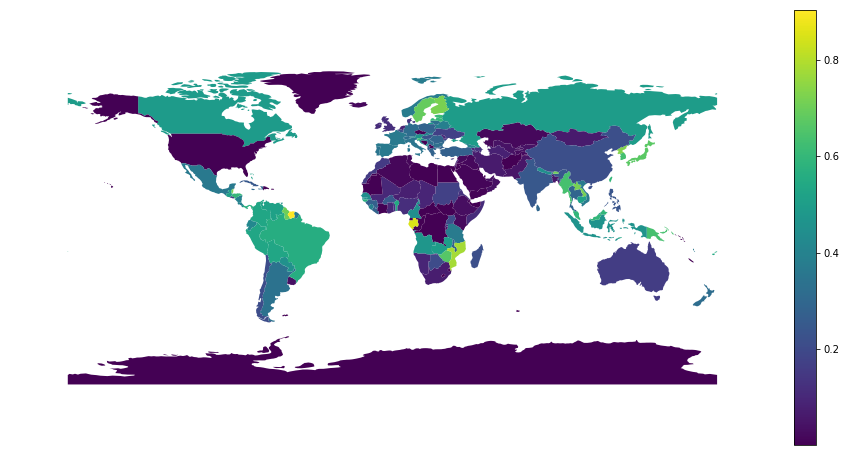

In [24]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

Because thereis such a large variaiton in percentage tree cover the above map with a continuous scale doesn't tell us much. To make a more informative plot we can use <code> scheme = ' '</code> 
And use <code> ['equal_interval', 'quantiles', 'fisher_jenks', 'fisher_jenks_sampled']</code> to define how the choropleth map is scaled.

C:\ProgramData\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql
C:\ProgramData\Anaconda3\lib\site-packages\pysal\viz\mapclassify\classifiers.py:276: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
C:\ProgramData\Anaconda3\lib\site-packages\pysal\viz\mapclassify\classifiers.py:276: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


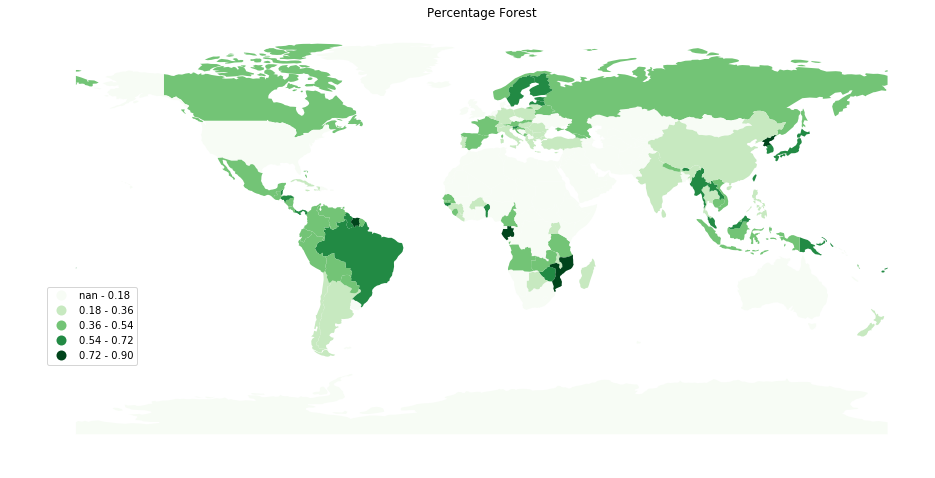

In [25]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,cmap='Greens',scheme='equal_interval', ax=ax)
# remove axis
ax.set_axis_off()
# position axis
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_title('Percentage Forest')
plt.show();

<font color='orchid'><b> Write your own code to map 'forest_area_km2'</font> <br>
Answer at the end

In [46]:
# plot here!


## Spatially Joining Data

It is also possible to join data based on their spatial relationship to each other using <code>.sjoin()</code>
For example we ight want to know the country each city is in.


Like with <code>pd.merge()</code> there are parameters we need to specify when using <code>gpd.sjoin()</code>

- Again firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code>gpd.sjoin(cities, countries, ... </code> <br>


- Secondly we need to specify how the tables are joined. (Again based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/)). In this case we are using an inner join
<code> gpd.sjoin(cities, countries, how="inner",... </code> <br>

- Finally we need to specify the tyep of spatial join using 'op'. From the [Geopandas documentation](http://geopandas.org/mergingdata.html) <br>
<i>The `op argument specifies how geopandas decides whether or not to join the attributes of one object to another. There are three different join options as follows:
    - <b>intersects:</b> The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.
    - <b>within:</b> The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).
    - <b>contains:</b> The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all. </i> <br>
    
<font color = 'orchid'><b> Run the code below to spatially join the data </font>

In [26]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

name_left                   geometry  index_right   pop_est continent  \
0    Vatican City  POINT (12.45339 41.90328)          141  62137802    Europe   
1      San Marino  POINT (12.44177 43.93610)          141  62137802    Europe   
192          Rome  POINT (12.48131 41.89790)          141  62137802    Europe   
2           Vaduz   POINT (9.51667 47.13372)          114   8754413    Europe   
184        Vienna  POINT (16.36469 48.20196)          114   8754413    Europe   

    name_right iso_a3  gdp_md_est  
0        Italy    ITA   2221000.0  
1        Italy    ITA   2221000.0  
192      Italy    ITA   2221000.0  
2      Austria    AUT    416600.0  
184    Austria    AUT    416600.0

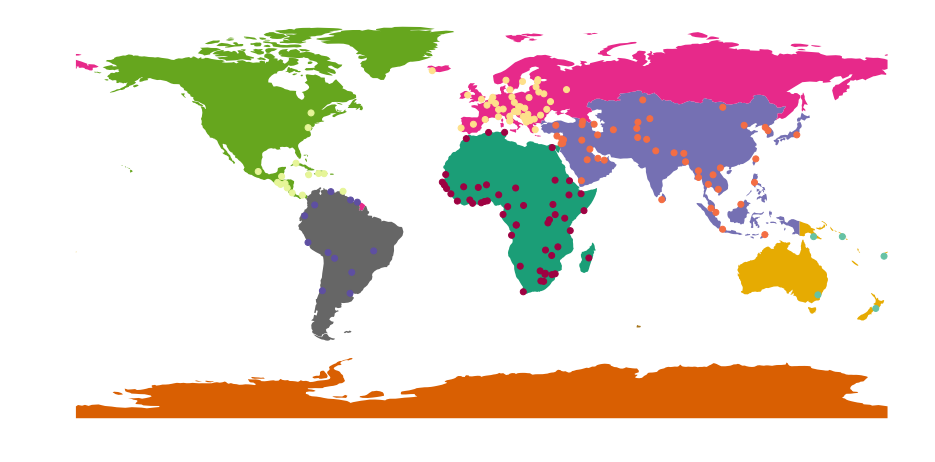

In [29]:
# let us plot the cities now coloured by the continent (a column initally from the cities dataframe)
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, cmap='Dark2')
# plot the cities and colour them based on continent
cities_with_country.plot(column='continent',ax=base, cmap='Spectral')
# remove axis
ax.set_axis_off()
plt.show()

Try doing the same for US cities and states:

In [49]:
# have a go here

## Overlay - creating spatial layers from the intersections, unions, and differences between map
I have included this for reference with a worked example, to show you how we can look at where spatial data overlaps. Full description an a list of the overlay operations can be found here: https://geopandas.org/set_operations.html
Have a read and explore the data

In [36]:
countries_in_buff =gpd.overlay(cities_buffer , countries, how='intersection')
countries_in_buff

name_1    pop_est      continent       name_2 iso_a3  \
0            Vatican City    6653210         Africa        Libya    LBY   
1               Podgorica    6653210         Africa        Libya    LBY   
2                Pristina    6653210         Africa        Libya    LBY   
3                  Skopje    6653210         Africa        Libya    LBY   
4                   Tunis    6653210         Africa        Libya    LBY   
5                  Tirana    6653210         Africa        Libya    LBY   
6                Valletta    6653210         Africa        Libya    LBY   
7                 Nicosia    6653210         Africa        Libya    LBY   
8                Khartoum    6653210         Africa        Libya    LBY   
9                 Tripoli    6653210         Africa        Libya    LBY   
10                Algiers    6653210         Africa        Libya    LBY   
11                 Athens    6653210         Africa        Libya    LBY   
12                   Rome    6653210         Africa        Libya    LBY   
13                  Cairo    6653210         Africa        Libya    LBY   
14           Vatican City   67106161         Europe       France    -99   
15             San Marino   67106161         Europe       France    -99   
16                  Vaduz   67106161         Europe       France    -99   
17             Luxembourg   67106161         Europe       France    -99   
18                 Monaco   67106161         Europe       France    -99   
19                Andorra   67106161         Europe       France    -99   
20          Port-of-Spain   67106161         Europe       France    -99   
21              Ljubljana   67106161         Europe       France    -99   
22             Bratislava   67106161         Europe       France    -99   
23              Podgorica   67106161         Europe       France    -99   
24                   Bern   67106161         Europe       France    -99   
25             Bridgetown   67106161         Europe       France    -99   
26                  Tunis   67106161         Europe       France    -99   
27             Georgetown   67106161         Europe       France    -99   
28             Paramaribo   67106161         Europe       France    -99   
29                 Zagreb   67106161         Europe       France    -99   
...                   ...        ...            ...          ...    ...   
2014            Singapore   96160163           Asia      Vietnam    VNM   
2015            Vientiane    7126706           Asia         Laos    LAO   
2016           Phnom Penh    7126706           Asia         Laos    LAO   
2017            Naypyidaw    7126706           Asia         Laos    LAO   
2018                Hanoi    7126706           Asia         Laos    LAO   
2019              Rangoon    7126706           Asia         Laos    LAO   
2020              Bangkok    7126706           Asia         Laos    LAO   
2021               Ottawa   35623680  North America       Canada    CAN   
2022     Washington, D.C.   35623680  North America       Canada    CAN   
2023  Bandar Seri Begawan   31381992           Asia     Malaysia    MYS   
2024           Phnom Penh   31381992           Asia     Malaysia    MYS   
2025         Kuala Lumpur   31381992           Asia     Malaysia    MYS   
2026              Bangkok   31381992           Asia     Malaysia    MYS   
2027               Manila   31381992           Asia     Malaysia    MYS   
2028              Jakarta   31381992           Asia     Malaysia    MYS   
2029            Singapore   31381992           Asia     Malaysia    MYS   
2030  Bandar Seri Begawan     443593           Asia       Brunei    BRN   
2031            Pyongyang   51181299           Asia  South Korea    KOR   
2032                Seoul   51181299           Asia  South Korea    KOR   
2033            Pyongyang  126451398           Asia        Japan    JPN   
2034                Seoul  126451398           Asia        Japan    JPN   
2035                Tokyo  126451398        

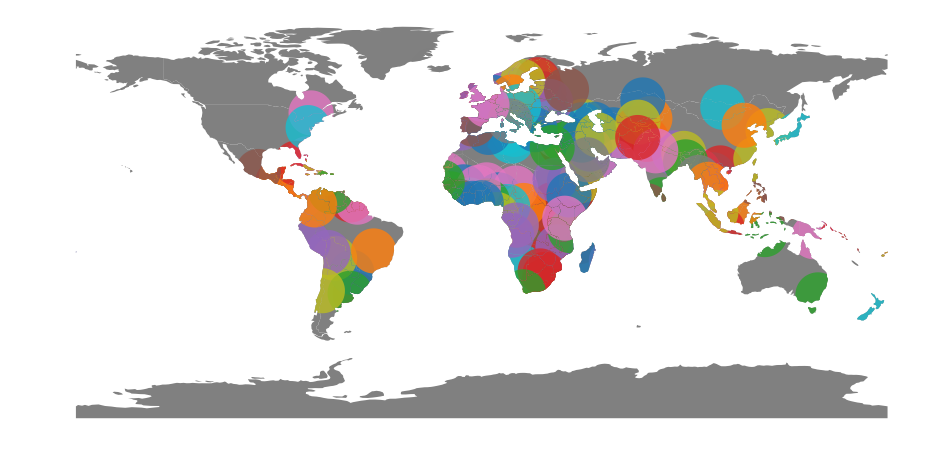

In [37]:
f,ax = plt.subplots(1, figsize=(16,8))

base = countries.plot(ax=ax,color='grey')
countries_in_buff.plot(ax=base, column='name_1',alpha=0.8)
# remove axis
ax.set_axis_off()
plt.show();

## Some other interesting maps

### Introducing geoplot: geospatial data visualization

package<i>'Geoplot is a high-level Python geospatial plotting library. It’s an extension to cartopy and matplotlib which makes mapping easy: like seaborn for geospatial. It comes with the following features:'</i>

Geoplot has many of the same functions that we have already used in visualising our maps, but also has some additional mapping features. Learn more here: https://residentmario.github.io/geoplot/plot_references/plot_reference.html

### Kernel density map

Much like the kernel density plots we produced in day 1 this produces a kernel density estimate of spatial point data. 

NameError: name 'gplt' is not defined

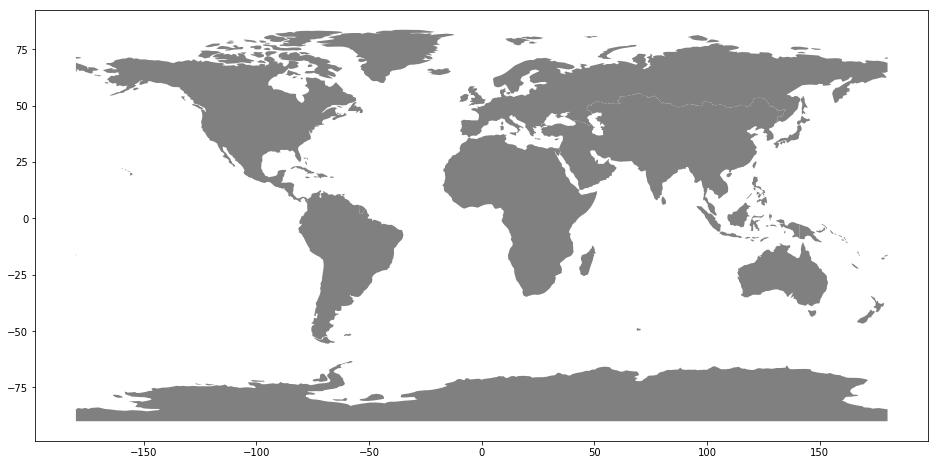

In [38]:
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, color='grey')

# map the kernel density estimate of world cities
gplt.kdeplot(cities, cmap="Reds", shade=True,ax=base, alpha=0.8)

# remove axis
ax.set_axis_off()

plt.show()

In [39]:
countries.crs

{'init': 'epsg:4326'}

In [40]:
help(gplt.cartogram)

NameError: name 'gplt' is not defined

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

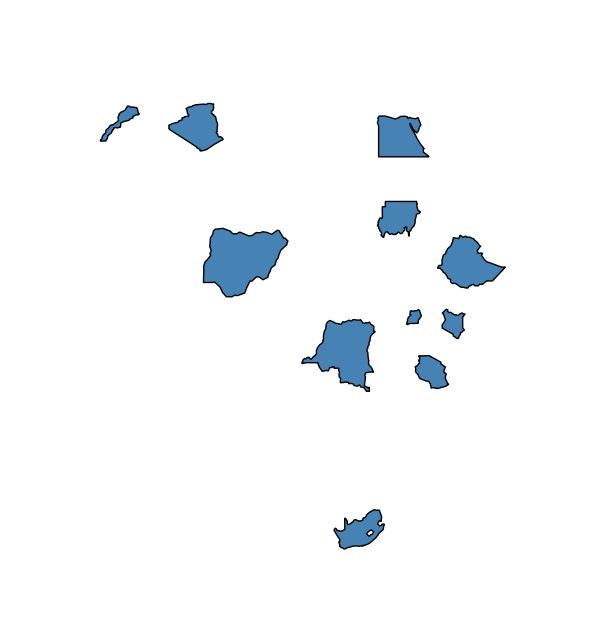

In [33]:
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)for refernce
#base = continents.plot(ax=ax, color='grey')

# map the countries resized by popualtion estimate
gplt.cartogram(africa, scale='pop_est',  ax=ax,limits=(0.2, 1))

# remove axis
ax.set_axis_off()

plt.show();

<font color ='orchid'><b> Write your own code to resize countries by GDP </font>

In [54]:
# Write your own code to resize countries by GDP


<font color ='orchid'><b> Write your own code to resize countries by forest area per km2 </font>

In [55]:
# Write your own code to resize countries by forest_area_km2


### Adding base maps
Base maps provide the reader with context for a map. At a smaller scale than we are currently using the basemap may show road networks or point of interest. 

We are going to use contextily to add the background map to the geographic data using the <code>.basemap()</code> function. 

#### Aligning the CRS
But first we need to convert the CRS of the data we want to plot to the Web Mercator projection (epsg=3857). So the base maps and geographic data we are plotting align. 

Unless the data file I want to plot is particularly big I tend to save the data with the Web Mercator projection as a new geodataframe to avoid confusion.

In [41]:
# convert CRS to epsg=3857 Web Mercator
africa_WM = africa.to_crs(epsg=3857)


f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual 
africa_WM .plot( alpha=0.5,column='pop_est',ax=ax)

# add ctx basemap to ax
ctx.add_basemap(ax)

ax.set_axis_off()

NameError: name 'africa' is not defined

#### Different base maps.
By default ctx.add_basemap() uses the Stamen Terrain style.

To see the available different base maps we can get the provider keys:

List of contextily providers:

In [42]:
ctx.providers.keys()

NameError: name 'ctx' is not defined

Each will have their own options, accessed by the code: <code> ctx.providers.<text color='red'>provider_from_above</font>.keys()</code>

E.g. <code> ctx.providers.OpenStreetMap.keys()</code>

In [58]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])

We can then use the provider and porvider options to choose our base map e.g. <code>OpenStreetMap.Mapnik</code>

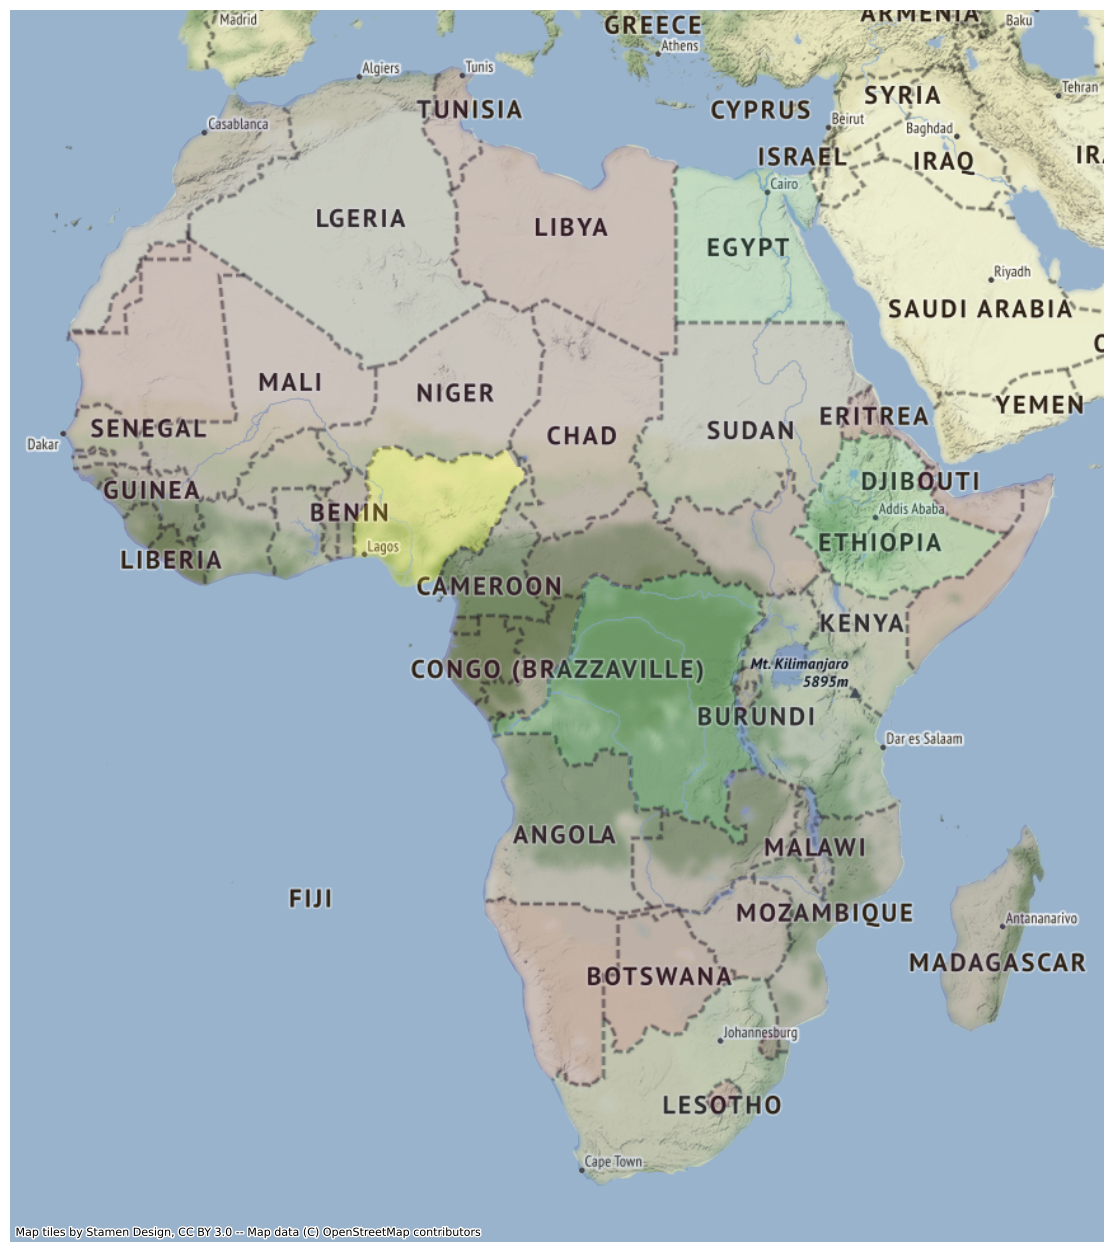

In [59]:


f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual 
africa_WM .plot(figsize=(10, 10), alpha=0.2,column='pop_est',ax=ax)

# add ctx basemap to ax, specifying the basemap provider and options
ctx.add_basemap(ax,url=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()


<font color='orchid'><b>  Play around with the providers and options to get different base maps.

#### Using geoplot to add a basemap

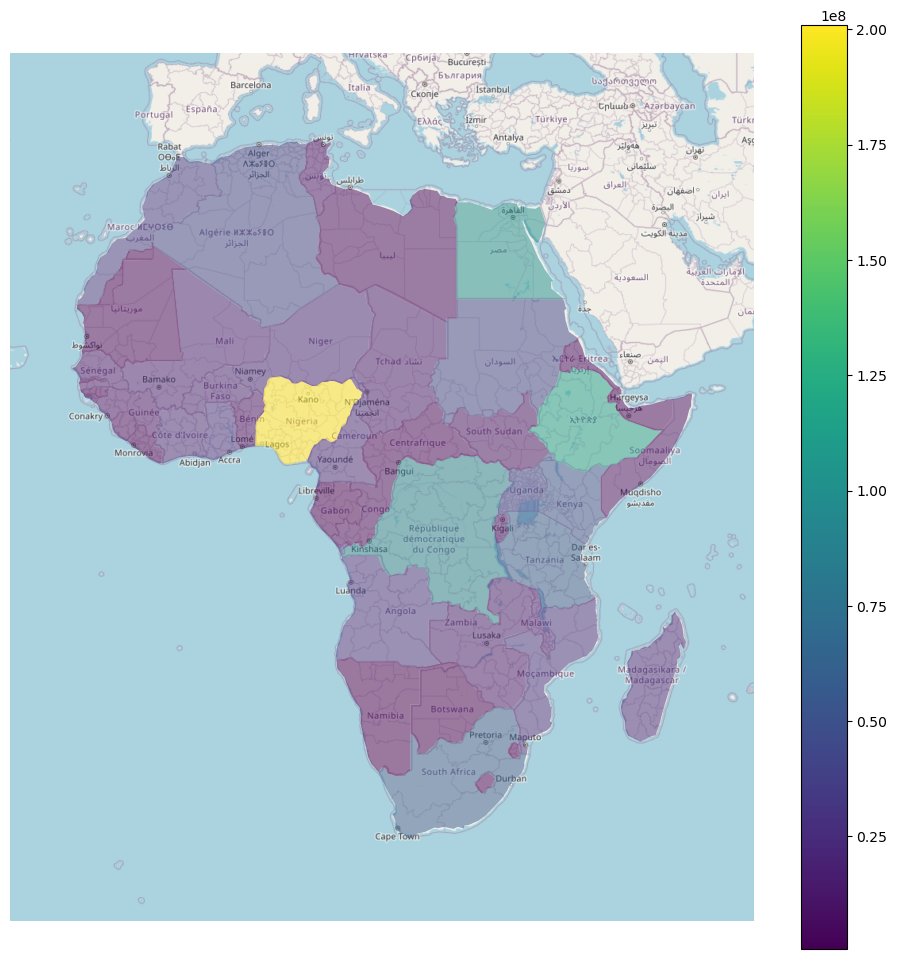

In [60]:

# specify basemap (webmap) including projection
# using geoplot we specify the figure size in the function
ax = gplt.webmap(africa, projection=gcrs.WebMercator(),figsize=(12, 12),)

# plot a chlorolpeth of africa by popualtion estiamte
gplt.choropleth(africa, ax=ax, hue='pop_est', legend=True, alpha=0.5);

<h1> Exercise answers</h1>  <a class="tocSkip">

## <a class="tocSkip">
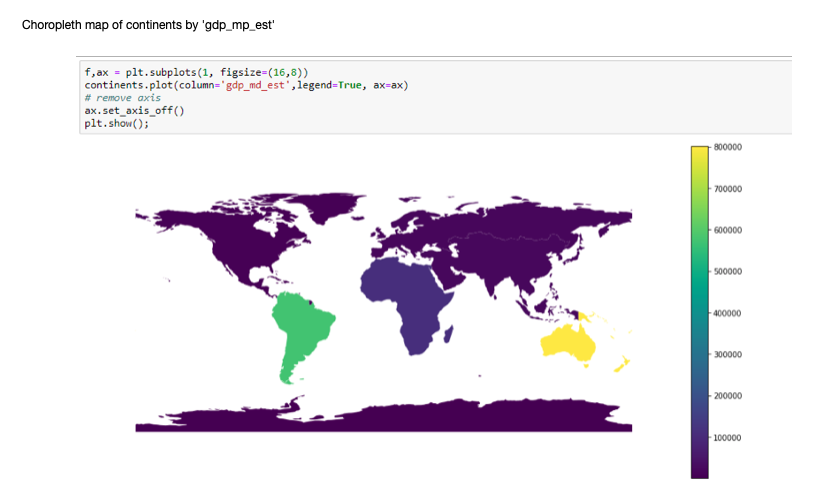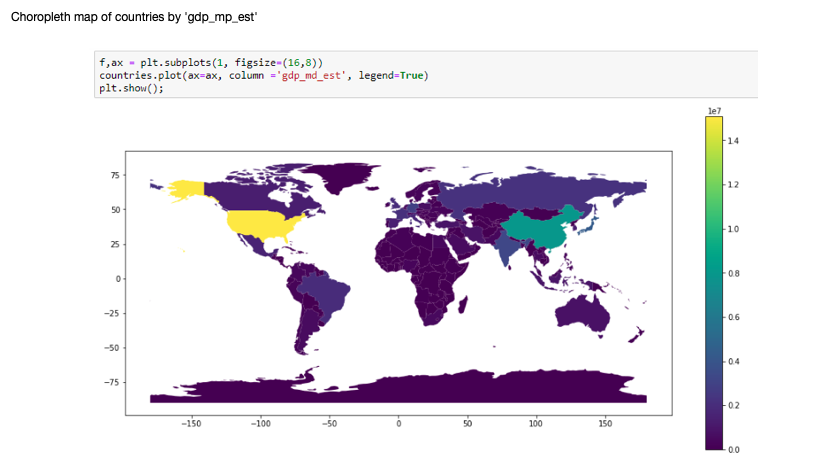

/var/folders/zb/krmfm5g13lz_rmrhr0vqhjbw0000gn/T/ipykernel_65410/1865872767.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries_centroid_buffer['geometry'] = countries_centroid.buffer(6)


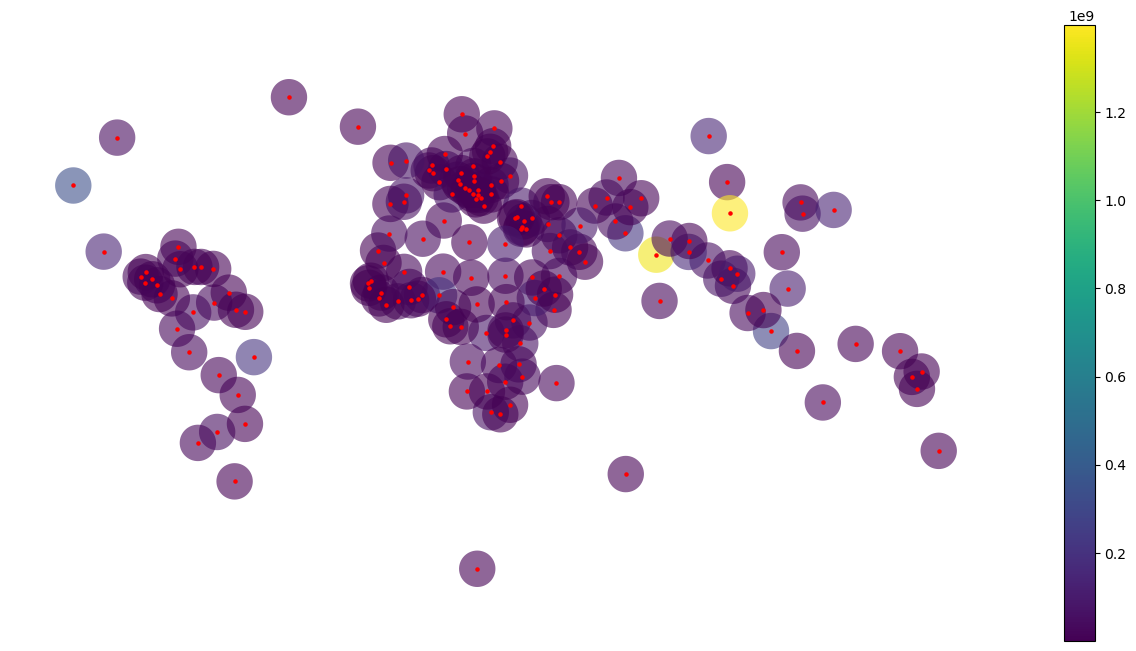

In [61]:
### buffering the countries centroids

# copy the centroids dataframe
countries_centroid_buffer = countries_centroid.copy()

# calculate the buffer, replacing the geometry column wiht the clauclted buffer geometry 
countries_centroid_buffer['geometry'] = countries_centroid.buffer(6)

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# plot the country centroid buffers on the basemap axis, colour the buffers based on popaultion estimate
base = countries_centroid_buffer.plot(ax=ax,column='pop_est', legend=True, alpha=0.6)
# plot the country centroids
countries_centroid.plot(ax=base,color='red', markersize=5)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

/var/folders/zb/krmfm5g13lz_rmrhr0vqhjbw0000gn/T/ipykernel_65410/1302073775.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa_convex_hull_buffer['geometry'] = africa_convex_hull.buffer(6)


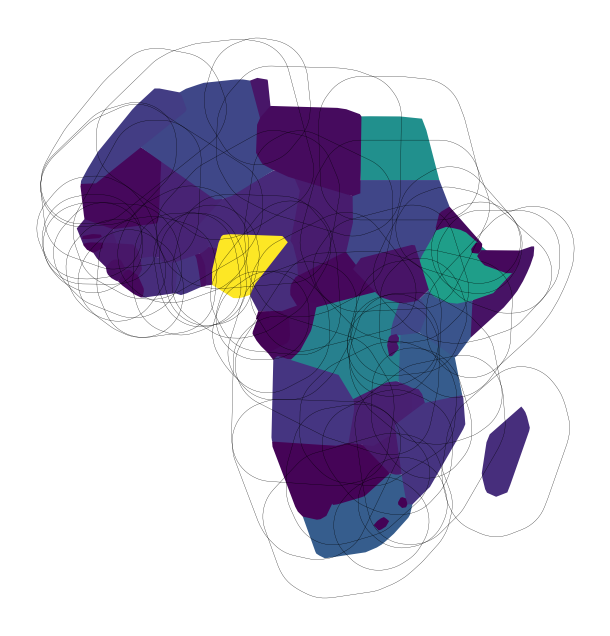

In [62]:
### buffering the Africa convex hull polygons

# copy the centroids dataframe
africa_convex_hull_buffer = africa_convex_hull.copy()

# calculate the buffer, replacing the geometry column wiht the clauclted buffer geometry 
africa_convex_hull_buffer['geometry'] = africa_convex_hull.buffer(6)

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))


# plot the africa dataframe on the basemap axis
base = africa_convex_hull.plot(ax=ax,column='pop_est')

# plot the afica centroid buffers, colour the buffers based on popaultion estimate
africa_convex_hull_buffer.boundary.plot(ax=ax,color=None,edgecolor='black',linewidth = 0.2)


# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

/var/folders/zb/krmfm5g13lz_rmrhr0vqhjbw0000gn/T/ipykernel_65410/2098934843.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa_convex_hull_centroid['geometry'] = africa_convex_hull.centroid


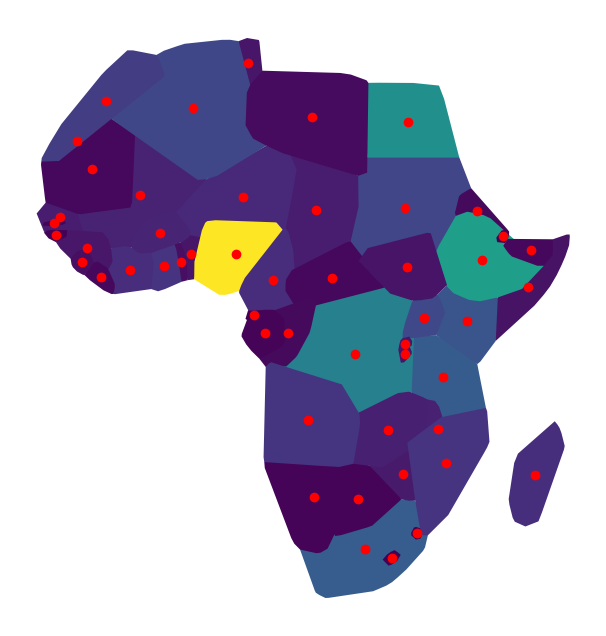

In [63]:
### get the centroids of the Africa convex hull polygons

# copy the centroids dataframe
africa_convex_hull_centroid = africa_convex_hull.copy()

# calculate the buffer, replacing the geometry column wiht the clauclted buffer geometry 
africa_convex_hull_centroid['geometry'] = africa_convex_hull.centroid

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))


# plot the africa dataframe on the basemap axis
base = africa_convex_hull.plot(ax=ax,column='pop_est')

# plot the centroids of the convex hull polygons, colour them red
africa_convex_hull_centroid.plot(ax=ax,color='red')


# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

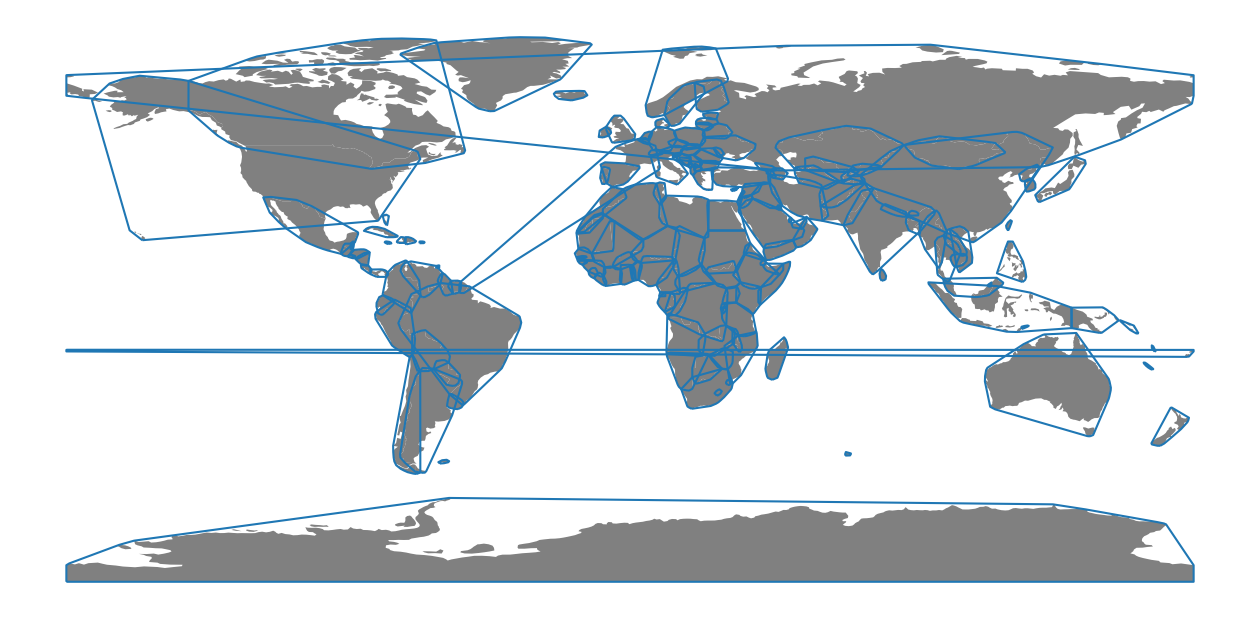

In [64]:
countries_convex_hull = countries.copy()

countries_convex_hull['geometry'] = countries.convex_hull

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the africa convex hull polygons
countries_convex_hull.boundary.plot(ax=base)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

# CDRC Data



## Option 1: Internet speed and usage level

It is possible that broadband speed affects usership classification: the faster your broadband the more likely you are to use it. You will investigate this using the Internet user classification (IUC), a bespoke classification that describes how people living in different parts of Great Britain interact with the Internet alongside broadband speed data from Ofcom. 

### Where to find the data:
https://data.cdrc.ac.uk/geodata-packs

- Internet User Classification (IUC) : West Yorkshire (or region of Choice)
- Broadband-speed : West Yorkshire (or region of Choice)


1. Download the data
2. Save the data in an appropriate file path

Meta data:

ICU: aggregate population profiles of Internet use and engagement at the Lower Super Output Area (LSOA). [Full metadata](https://data.cdrc.ac.uk/system/files/iuc2018userguide.pdf)

Broadband speed:the average fixed-line broadband speed by output area, based on 2016, 2017 and 2018 data released by Ofcom at the Lower Super Output Area (LSOA). [Full metadata](https://data.cdrc.ac.uk/dataset/broadband-speed)



## Option 2: House price and AHAH

Have a look at house price where you live and see if this varies in line with environmental features of that area. 
The data available to download includes Median House Prices (Quarterly) for the years 1995-2018 and the Access to Healthy Assets & Hazards (AHAH)data. The AHAH data is a multi-dimensional index developed by the CDRC for Great Britain measuring how ‘healthy’ neighbourhoods are. 

The AHAH Index includes:
- Retail environment (access to fast food outlets, pubs, off-licences, tobacconists, gambling outlets),
- Health services (access to GPs, hospitals, pharmacies, dentists, leisure services),
- Physical environment (Blue Space, Green Space - Active, Green Space - Passive), and
- Air quality (Nitrogen Dioxide, Particulate Matter 10, Sulphur Dioxide).

Presence or absence of these environmental features may influence how attractive an environment is to live in and therefore house price. These variables may also be proxy for other facotrs, e.g. air pollution may give an idea of traffic volume.


### Where to find the data:
https://data.cdrc.ac.uk/geodata-packs

- Access to Healthy Assets and Hazards AHAH : West Yorkshire (or region of Choice)
- Housing Prices : West Yorkshire (or region of Choice)


1. Download the data
2. Save the data in an appropriate file path

About the datasets:


## Census data
We will also show you how to [download census data](http://infuse.ukdataservice.ac.uk) that you can also add to your data exploration and analysis of house price or internet usage. 



## Some code to get you started 

We have downloaded the datasets from the CDRC for the West Yorkshire region, these are saved on GitHub under the folder 'Example_CDRC_Data'. You may wish to download these yourself from CDRC or pick another region. In which case make sure you change the file directories below to match where you saved the files. 

### Option 1: Getting started

In [43]:
# change the file path to match where you saved the data
internet_shape = gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
internet_data =  pd.read_csv('Example_CDRC_Data/Internet_User_Classification/Combined_Authorities/E47000003/tables/E47000003.csv')        

internet  = pd.merge(internet_shape, internet_data,  on='lsoa11cd',  how='left')
internet.head()

DriverError: Example_CDRC_Data/shapefiles/E47000003.shp: No such file or directory

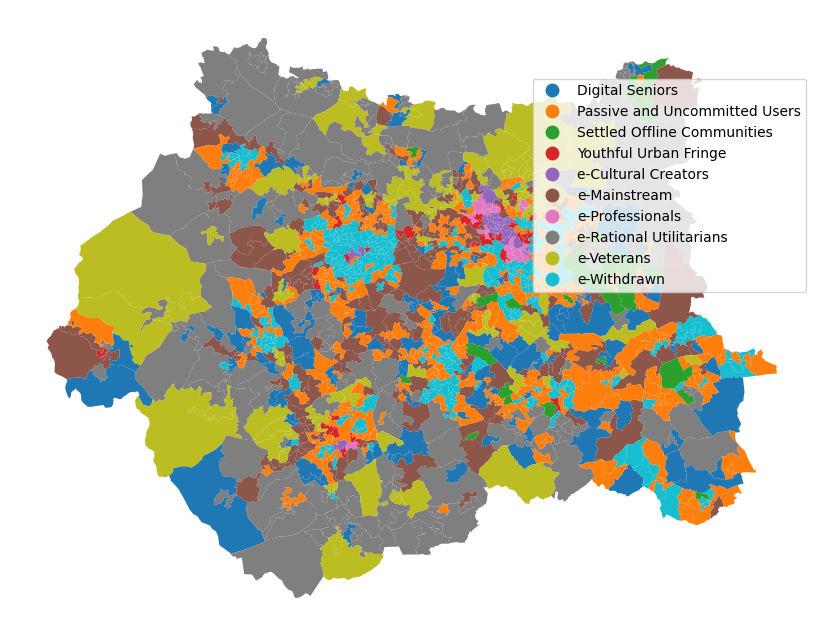

In [44]:
f,ax = plt.subplots(1, figsize=(16,8))

internet.plot('GRP_LABEL', categorical=True, legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))

plt.show()

In [45]:
# change the file path to match where you saved the data
broadband_shape = gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
broadband_data =  pd.read_csv('Example_CDRC_Data/Fixed_Broadband/Combined_Authorities/E47000003/tables/E47000003_2018.csv')        

broadband  = pd.merge(broadband_shape, broadband_data,  on='lsoa11cd',  how='left')
broadband.head()

lsoa11cd                                           geometry     oa11cd  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053358   
1  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053359   
2  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053365   
3  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053367   
4  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...  E00053368   

   Median.download.speed..Mbit.s.  Average.download.speed..Mbit.s.  \
0                            39.8                             48.0   
1                            31.0                             54.4   
2                            52.5                             66.6   
3                            39.8                             54.1   
4                            40.0                             56.5   

   Minimum.download.speed..Mbit.s.  Maximum.download.speed..Mbit.s.  \
0                              0.9                            200.0   
1                              2.2                            200.0   
2                              2.5                            200.0   
3                              0.3                            200.0   
4                              3.1                            200.0   

   Average.download.speed..Mbit.s..for.lines...10Mbit.s  \
0                                                5.8      
1                                                7.1      
2                                                6.0      
3                                                5.2      
4                                                7.6      

   Average.download.speed..Mbit.s..for.lines.10.30Mbit.s  \
0                                               18.0       
1                                               17.2       
2                                               13.8       
3                                               19.1       
4                                               10.7       

   Average.download.speed..Mbit.s..for.SFBB.lines  ...  \
0                                            82.0  ...   
1                                            94.5  ...   
2                                            91.3  ...   
3                                            90.0  ...   
4                                            81.4  ...   

   Number.of.premises.with.UFBB.availability  \
0                                        153   
1                                        137   
2                                        126   
3                                         97   
4                                        119   

   Number.of.premises.with.Full.Fibre.availability  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Number.of.premises.unable.to.receive.2Mbit.s  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Number.of.premises.unable.to.receive.5Mbit.s  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Number.of.premises.unable.to.receive.10Mbit.s  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Number.of.premises.unable.to.receive.30Mbit.s  \
0                            

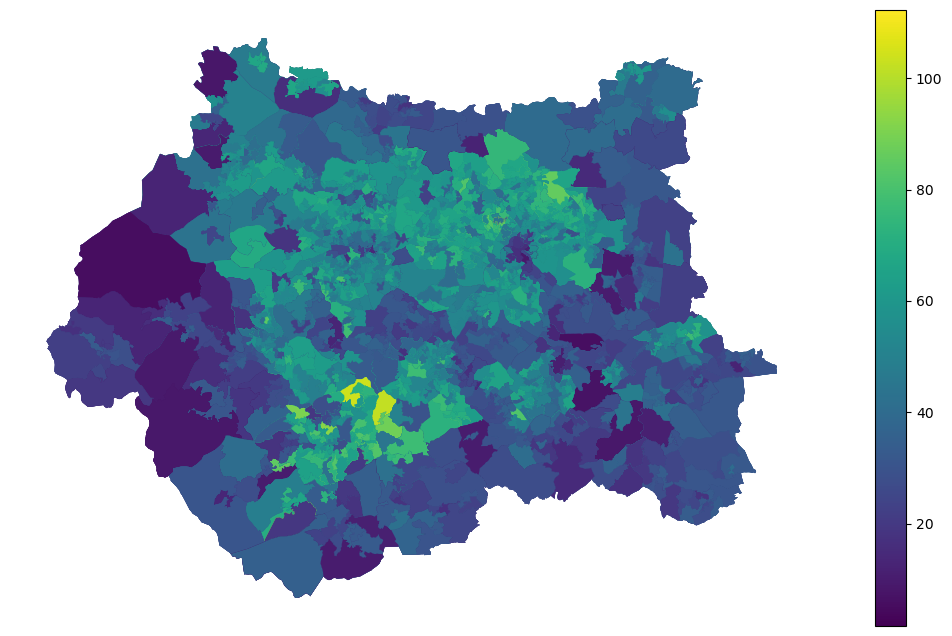

In [46]:
f,ax = plt.subplots(1, figsize=(16,8))

broadband.plot('Average.download.speed..Mbit.s.', legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

### Option 2: Getting started

In [44]:
# change the file path to match where you saved the data
LA_shape = gpd.read_file('england_utla_2022_bgc.shp')

DriverError: Unable to open england_utla_2022_bgc.shx or england_utla_2022_bgc.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [47]:
# change the file path to match where you saved the data
house_shape = gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
house_price =pd.read_csv('Example_CDRC_Data/Housing_Prices/Combined_Authorities/E47000003/tables/E47000003_LR001MED.csv')

In [48]:
house_price.head()

lsoa11cd       CAUTH18NM       lsoa11nm  median_95Q1  median_95Q2  \
0  E01010568  West Yorkshire  Bradford 016A      57000.0      43850.0   
1  E01010569  West Yorkshire  Bradford 016B      40000.0      43000.0   
2  E01010570  West Yorkshire  Bradford 018A     101000.0     109000.0   
3  E01010571  West Yorkshire  Bradford 016C      44000.0      37475.0   
4  E01010572  West Yorkshire  Bradford 016D      58500.0      50500.0   

   median_95Q3  median_95Q4  median_96Q1  median_96Q2  median_96Q3  ...  \
0      60000.0      56000.0      45500.0      59500.0      54500.0  ...   
1      43000.0      29750.0      49000.0      28500.0      82000.0  ...   
2     119000.0      92000.0     112250.0      95500.0     110000.0  ...   
3      50000.0      17000.0      41250.0      40250.0      34500.0  ...   
4      57725.0      52750.0      50000.0      47500.0      49000.0  ...   

   median_16Q3  median_16Q4  median_17Q1  median_17Q2  median_17Q3  \
0     107750.0     169500.0     161250.0     200725.0     153000.0   
1     148500.0     116000.0     138750.0     124500.0     145000.0   
2     412000.0     359000.0     310000.0     361000.0     307500.0   
3     151750.0     147750.0     157500.0     121000.0     138750.0   
4     176000.0     198500.0     154975.0     189000.0     198000.0   

   median_17Q4  median_18Q1  median_18Q2  median_18Q3  median_18Q4  
0     210000.0     171500.0     180000.0     175600.0     228000.0  
1     168000.0     104000.0     137000.0     125000.0     150000.0  
2     350000.0     301000.0     307500.0     340000.0     315000.0  
3     158000.0     153000.0     134500.0     148750.0     150000.0  
4     199950.0     187975.0     156500.0     161000.0     184975.0  

[5 rows x 99 columns]

In [49]:
house  = pd.merge(house_shape, house_price,  on='lsoa11cd',  how='left')
house.head()

lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  median_95Q1  median_95Q2  median_95Q3  \
0  West Yorkshire  Bradford 016A      57000.0      43850.0      60000.0   
1  West Yorkshire  Bradford 016B      40000.0      43000.0      43000.0   
2  West Yorkshire  Bradford 018A     101000.0     109000.0     119000.0   
3  West Yorkshire  Bradford 016C      44000.0      37475.0      50000.0   
4  West Yorkshire  Bradford 016D      58500.0      50500.0      57725.0   

   median_95Q4  median_96Q1  median_96Q2  ...  median_16Q3  median_16Q4  \
0      56000.0      45500.0      59500.0  ...     107750.0     169500.0   
1      29750.0      49000.0      28500.0  ...     148500.0     116000.0   
2      92000.0     112250.0      95500.0  ...     412000.0     359000.0   
3      17000.0      41250.0      40250.0  ...     151750.0     147750.0   
4      52750.0      50000.0      47500.0  ...     176000.0     198500.0   

   median_17Q1  median_17Q2  median_17Q3  median_17Q4  median_18Q1  \
0     161250.0     200725.0     153000.0     210000.0     171500.0   
1     138750.0     124500.0     145000.0     168000.0     104000.0   
2     310000.0     361000.0     307500.0     350000.0     301000.0   
3     157500.0     121000.0     138750.0     158000.0     153000.0   
4     154975.0     189000.0     198000.0     199950.0     187975.0   

   median_18Q2  median_18Q3  median_18Q4  
0     180000.0     175600.0     228000.0  
1     137000.0     125000.0     150000.0  
2     307500.0     340000.0     315000.0  
3     134500.0     148750.0     150000.0  
4     156500.0     161000.0     184975.0  

[5 rows x 100 columns]

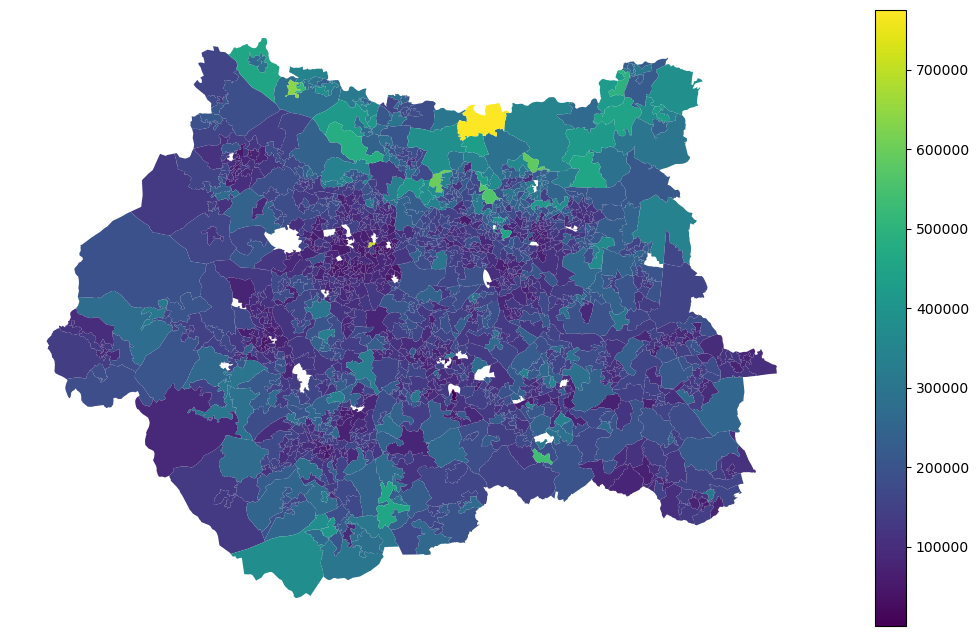

In [50]:
f,ax = plt.subplots(1, figsize=(16,8))
house.plot(column='median_18Q2',ax=ax, legend=True)

# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

In [51]:
AHAH_shape =gpd.read_file('Example_CDRC_Data/shapefiles/E47000003.shp')
AHAH_data = pd.read_csv('Example_CDRC_Data/Access_to_Healthy_Assets_and_Hazards_AHAH/Combined_Authorities/E47000003/tables/E47000003.csv')

AHAH = pd.merge(AHAH_shape, AHAH_data,  on='lsoa11cd',  how='left')

In [52]:
AHAH.head()

lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  r_rank  h_rank  g_rank  e_rank      r_exp  \
0  West Yorkshire  Bradford 016A   26204   24968   25575   18970  22.244389   
1  West Yorkshire  Bradford 016B   20123   24733   14741   19068  14.863754   
2  West Yorkshire  Bradford 018A    6803   34023   33369   14715   4.035315   
3  West Yorkshire  Bradford 016C   30537   18925    9414   20192  29.470202   
4  West Yorkshire  Bradford 016D   26087   13826   16249   18577  22.077559   

       h_exp  ...  d_pubs_dist  d_leis_dist  d_blue_dist  d_off_dist  \
0  20.540297  ...            9            2            1           5   
1  20.230112  ...            4            4            4           5   
2  37.574157  ...            2            7            5           3   
3  13.652407  ...            8            1            1           6   
4   9.109686  ...            7            2            2           5   

   d_tobac_dist  d_green_pas  d_green_act  d_no2_mean  d_pm10_mean  d_so2_mean  
0             6            8           10           6            3           7  
1             7            6            3           6            3           7  
2             4            7           10           5            3           6  
3             8            7            5           6            4           8  
4             7            8            6           6            3           7  

[5 rows x 52 columns]

Check CRS

In [53]:
AHAH.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance_Survey_of_Great_Britain_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Note CRS: 'tmerc' learn more here: https://proj.org/operations/projections/tmerc.html

Ensure AHAH CRS the same as the house CRS (to allow overlayed mapping) 

In [54]:
AHAH = AHAH.to_crs(house.crs)

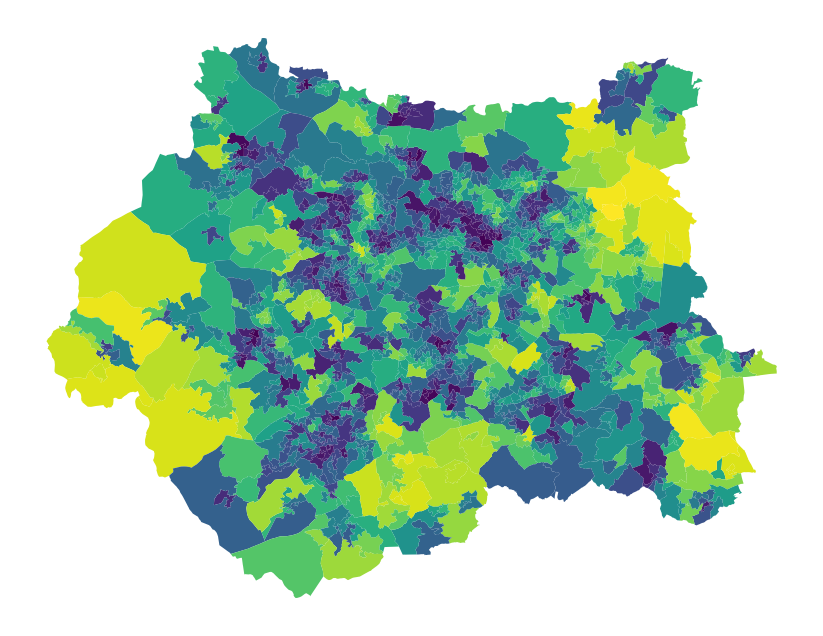

In [55]:
f,ax = plt.subplots(1, figsize=(16,8))
AHAH.plot(ax=ax, column='g_rank');
# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

Data for the AHAH index was collected in or as close to 2016 as possible. So we might only want to look at how environmental quality affects house price in 2016.

In [56]:
# get just data releavnt to 2016 from house price df
house_16 = house[['lsoa11cd', 'geometry', 'CAUTH18NM', 'lsoa11nm','median_16Q1',
       'median_16Q2', 'median_16Q3', 'median_16Q4']]

In [57]:
house_16.head()

lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  median_16Q1  median_16Q2  median_16Q3  \
0  West Yorkshire  Bradford 016A     141500.0     155500.0     107750.0   
1  West Yorkshire  Bradford 016B     118500.0     155000.0     148500.0   
2  West Yorkshire  Bradford 018A     330000.0     345000.0     412000.0   
3  West Yorkshire  Bradford 016C     133500.0     130000.0     151750.0   
4  West Yorkshire  Bradford 016D     147000.0     170000.0     176000.0   

   median_16Q4  
0     169500.0  
1     116000.0  
2     359000.0  
3     147750.0  
4     198500.0

In [58]:
house_16.groupby(['median_16Q2', 'median_16Q3', 'median_16Q4'])

We might also want to calculate the mean house price across 2016

In [59]:
house_16['mean_16'] = house_16.loc[: , ['median_16Q2', 'median_16Q3', 'median_16Q4']].mean(axis=1)
house_16.head()

/Users/francescapontin/opt/anaconda3/envs/spatial_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


lsoa11cd                                           geometry  \
0  E01010568  POLYGON ((416587.878 439226.159, 416537.879 43...   
1  E01010569  POLYGON ((415417.183 439125.944, 415384.994 43...   
2  E01010570  POLYGON ((414616.693 438845.694, 414460.174 43...   
3  E01010571  POLYGON ((415762.869 438492.562, 415730.593 43...   
4  E01010572  POLYGON ((415579.749 439223.166, 415664.902 43...   

        CAUTH18NM       lsoa11nm  median_16Q1  median_16Q2  median_16Q3  \
0  West Yorkshire  Bradford 016A     141500.0     155500.0     107750.0   
1  West Yorkshire  Bradford 016B     118500.0     155000.0     148500.0   
2  West Yorkshire  Bradford 018A     330000.0     345000.0     412000.0   
3  West Yorkshire  Bradford 016C     133500.0     130000.0     151750.0   
4  West Yorkshire  Bradford 016D     147000.0     170000.0     176000.0   

   median_16Q4        mean_16  
0     169500.0  144250.000000  
1     116000.0  139833.333333  
2     359000.0  372000.000000  
3     147750.0  143166.666667  
4     198500.0  181500.000000

Spatially join the AHAH data to the house price data

In [60]:
AHAH_house = gpd.sjoin(house_16, AHAH, how='left')

# check

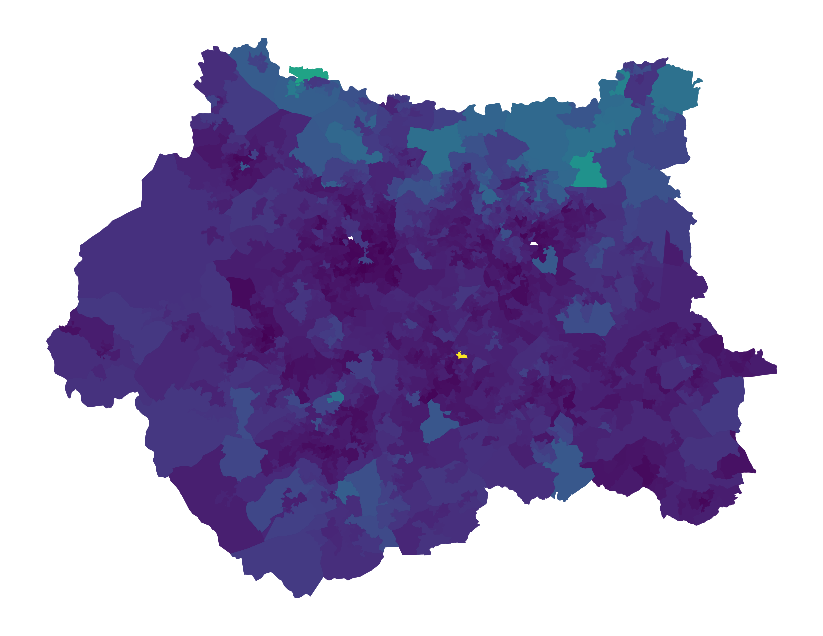

In [61]:
# plot to check join worked 

f,ax = plt.subplots(1, figsize=(16,8))

AHAH_house.plot(column='mean_16',ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

## General analysis ideas
- use summary statistics to get a better understanding of the data
- check for any missing data
- use .loc[] to identify areas which meet criteria of interest
- visualise different element of the data 
- map the data:
    - Produce choropleth maps of other variables
    - Try producing a figure with multiple maps to compare variables
    - Calculate the centroids of the LSOA and try plotting the points varying colour and marker size
    - have a go at buffering or calculating convex hull polygons around the data

- use the data to build predictive models:
    - e.g. Predict average data usage given the Internet user classification (categorical independent variables
    - e.g. Predict house price using environmental variables from the AHAH index.
    - built and evaluated models using the visualisations and techniques introduce in day 1 exercise 5
    - Build other predictive models using the available data or read in census data to help you improve the models
- Try recreating some visualisations from the seaborn examples gallery using your own data: https://seaborn.pydata.org/examples/index.html